Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [3]:
airbnb<-airbnb[c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_madrid <- airbnb[airbnb$City=="Madrid",]
df_madrid <- df_madrid[df_madrid$Room.Type=="Entire home/apt",]
df_madrid <- df_madrid[df_madrid$Neighbourhood != "",]
df_madrid <- subset(df_madrid, select = -c(City))


In [5]:
df_madrid$Neighbourhood <- factor(df_madrid$Neighbourhood)

In [6]:
nrow(df_madrid)

[1] 5601

In [7]:
head(df_madrid)

,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
4,Entire home/apt,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Entire home/apt,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Entire home/apt,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095
9,Entire home/apt,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281
10,Entire home/apt,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019
15,Entire home/apt,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [8]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903

In [9]:
head(df_madrid)

,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
4,Entire home/apt,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Entire home/apt,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,Entire home/apt,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
9,Entire home/apt,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
10,Entire home/apt,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
15,Entire home/apt,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [10]:
paste("El número de na en los metros cuadrados es:", sum(is.na(df_madrid$Square.Meters)))

[1] "El número de na en los metros cuadrados es: 5254"

In [11]:
paste("El porcentaje de NaN en los metros cuadrados es:",round(sum(is.na(df_madrid$Square.Meters))/length(df_madrid$Square.Meters)*100,2),'%')

[1] "El porcentaje de NaN en los metros cuadrados es: 93.8 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [12]:
paste("El número apartamentos con 0 metros cuadrados es:", nrow(df_madrid[which(df_madrid$Square.Meters == "0"),]))

[1] "El número apartamentos con 0 metros cuadrados es: 128"

In [13]:
paste("El % de número apartamentos con 0 metros cuadrados es:",round(nrow(df_madrid[which(df_madrid$Square.Meters == "0"),])/(length(df_madrid$Square.Meters)-sum(is.na(df_madrid$Square.Meters)))*100,2),'%')

[1] "El % de número apartamentos con 0 metros cuadrados es: 36.89 %"

Reemplazar todos los 0m^2 por NA 

In [14]:
df_madrid$Square.Meters[which(df_madrid$Square.Meters == "0")] <- NA

In [15]:
paste("El número de NaN en los metros cuadrados (despues de añadir los 0m2) es:", sum(is.na(df_madrid$Square.Meters)))

[1] "El número de NaN en los metros cuadrados (despues de añadir los 0m2) es: 5382"

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


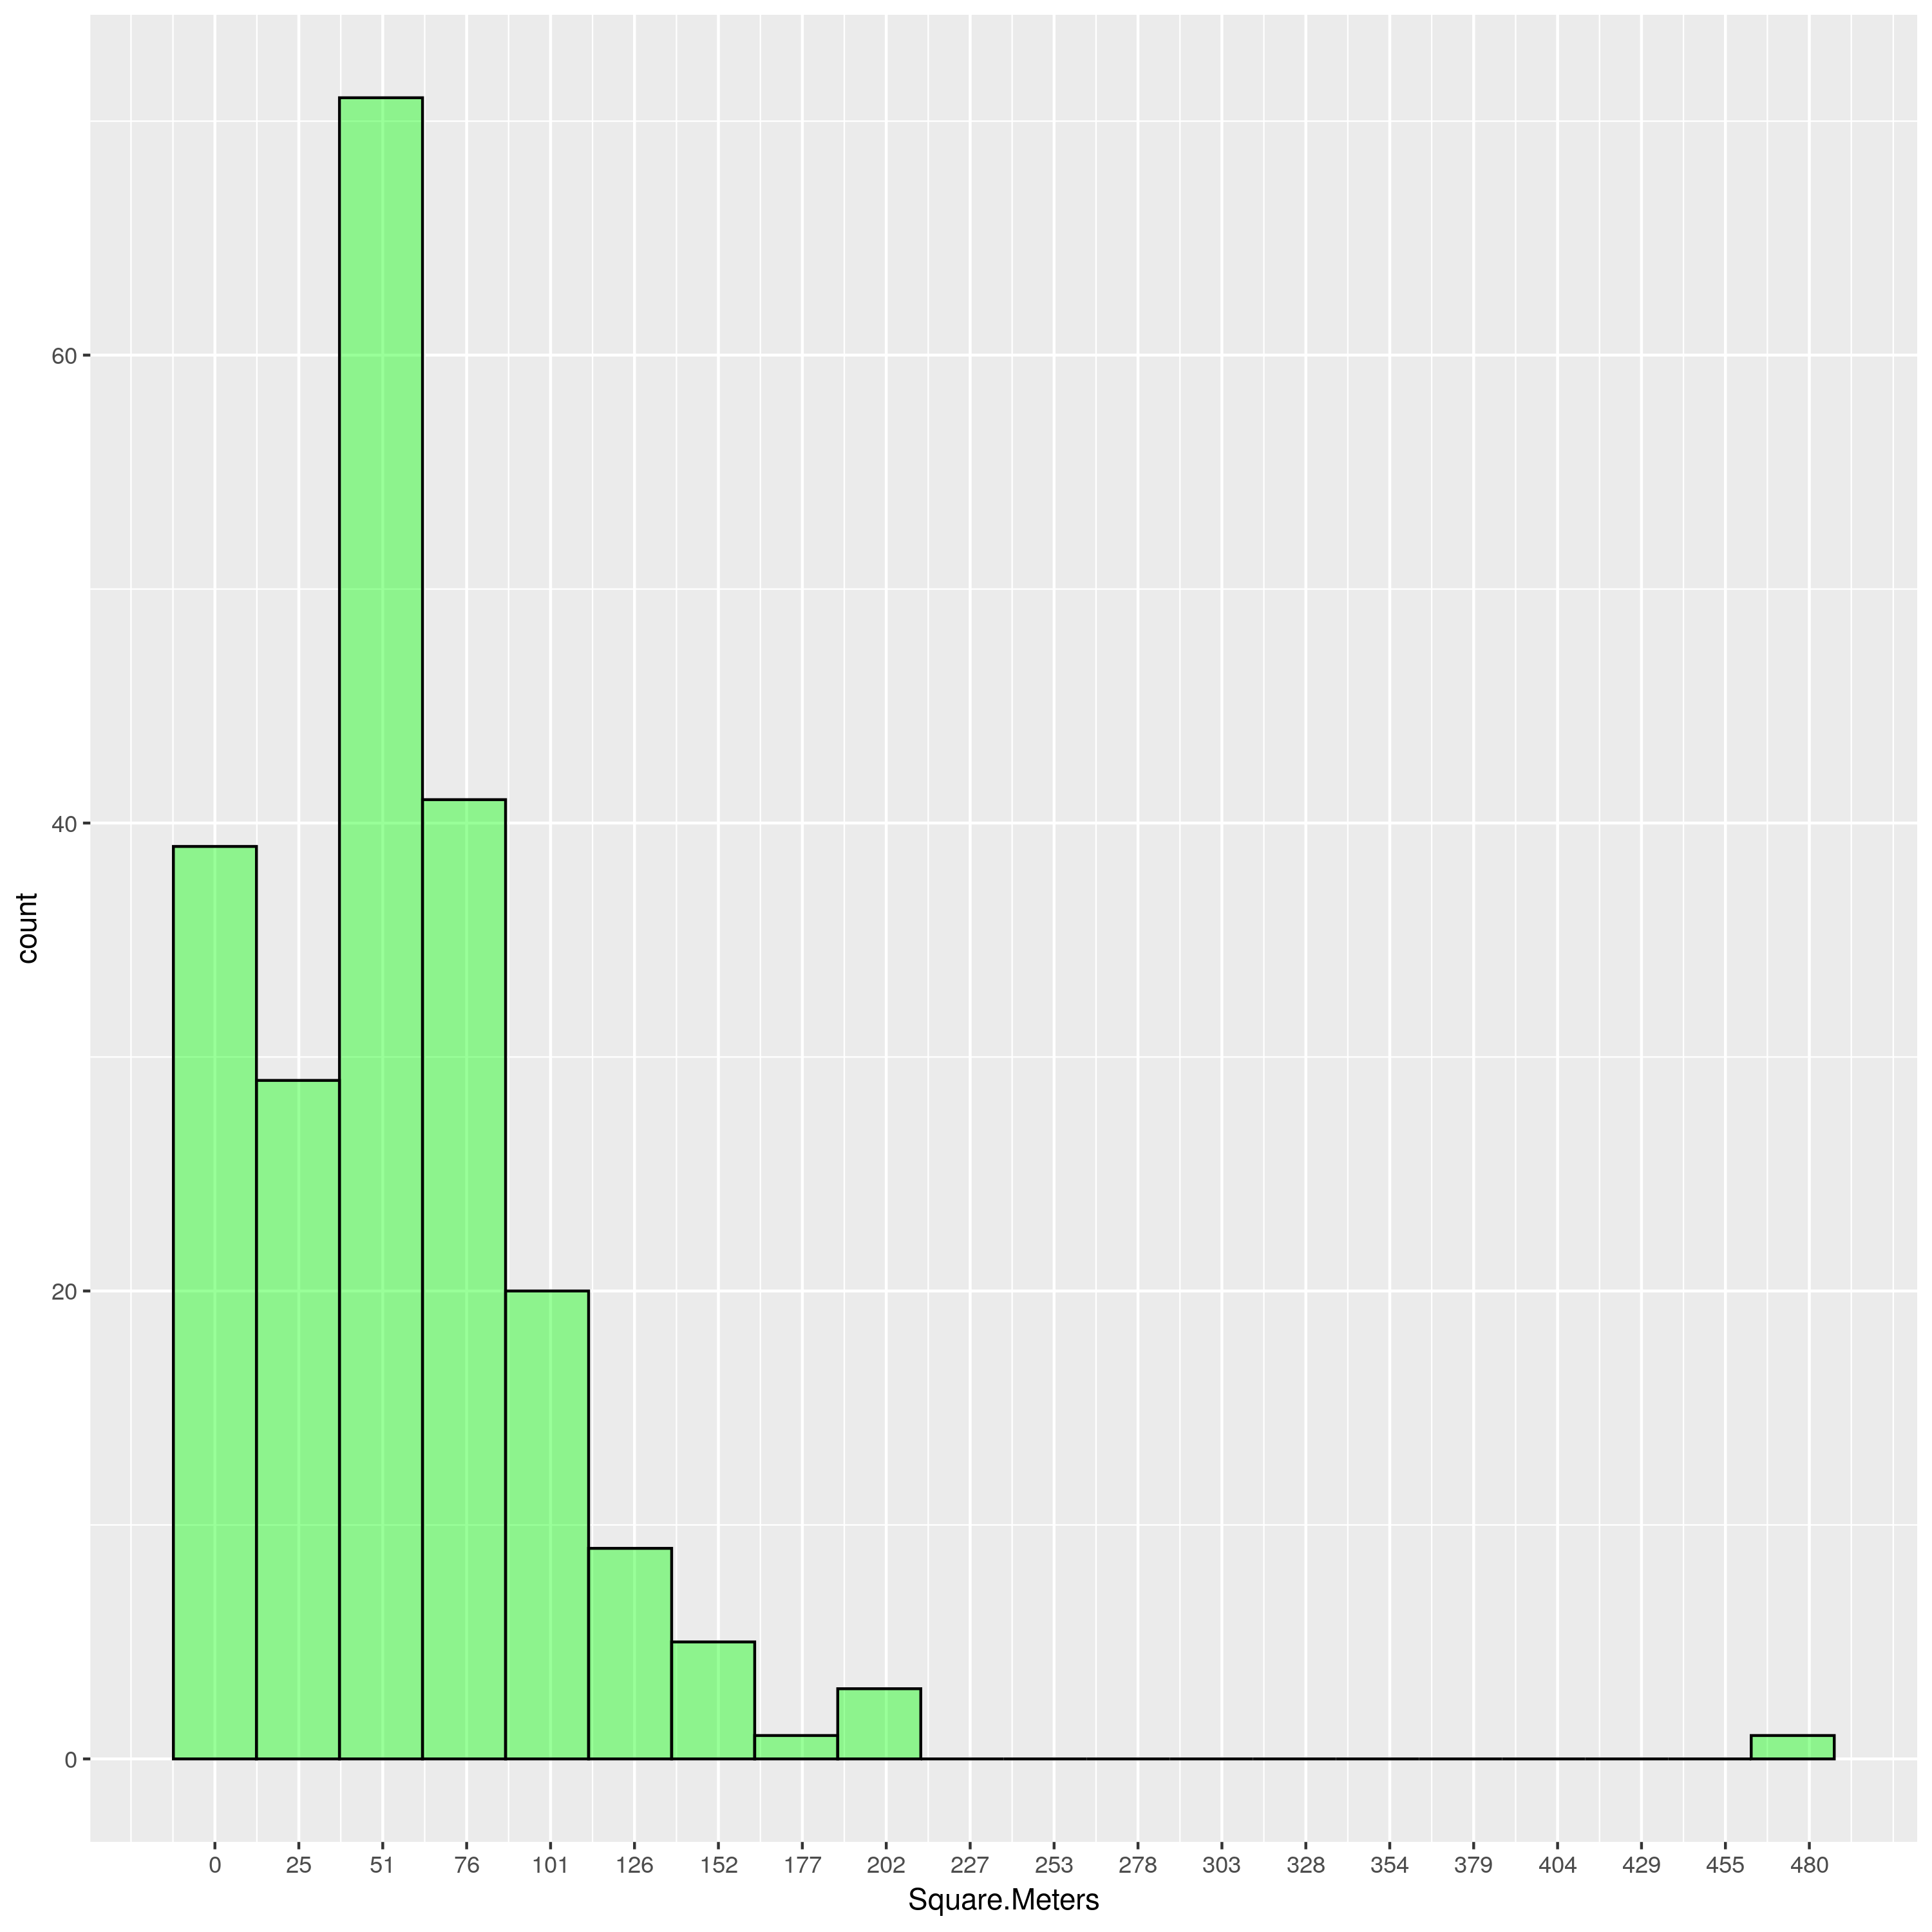

In [16]:
#pinto histograma
options(repr.plot.height=10,repr.plot.width=10)
ggplot(data=df_madrid,aes(x=Square.Meters))+
    geom_histogram(binwidth = 25, col='black', fill='green', alpha=0.4)+
    scale_x_continuous(breaks=seq(0,480,length.out=20),labels=round(seq(0,480,length.out=20),))

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [17]:
df_madrid$Square.Meters[which(df_madrid$Square.Meters < 20)] <- NA

In [18]:
paste("El número de NaN en los metros cuadrados (despues de añadir los menores de 20m2) es:", sum(is.na(df_madrid$Square.Meters)))

[1] "El número de NaN en los metros cuadrados (despues de añadir los menores de 20m2) es: 5427"

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [19]:
list_delete=c()
for (i in unique(df_madrid$Neighbourhood)){
#     print(i)
    if (sum(is.na(df_madrid$Square.Meters[which(df_madrid$Neighbourhood==i)]))==nrow(df_madrid[which(df_madrid$Neighbourhood==i),]))
        {
        list_delete=append(list_delete,i)
        }
}


In [20]:
print(list_delete)

 [1] "Ibiza"               "Guindalera"          "Hispanoamérica"     
 [4] "Nueva España"        "Castillejos"         "Valdeacederas"      
 [7] "Gaztambide"          "Hortaleza"           "Fuencarral-el Pardo"
[10] "Villaverde"          "Aluche"              "Tetuán"             
[13] "Puente de Vallecas"  "La Chopera"          "Legazpi"            
[16] "Delicias"            "Moncloa"             "Bellas Vistas"      
[19] "Berruguete"          "Imperial"            "Estrella"           
[22] "Prosperidad"         "Villa de Vallecas"   "Vallehermosa"       
[25] "Atocha"              "Arganzuela"          "Fuencarral-El Pardo"


In [21]:
df_madrid <- filter(df_madrid, !(Neighbourhood %in% list_delete))

In [22]:
nrow(df_madrid)

[1] 4901

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




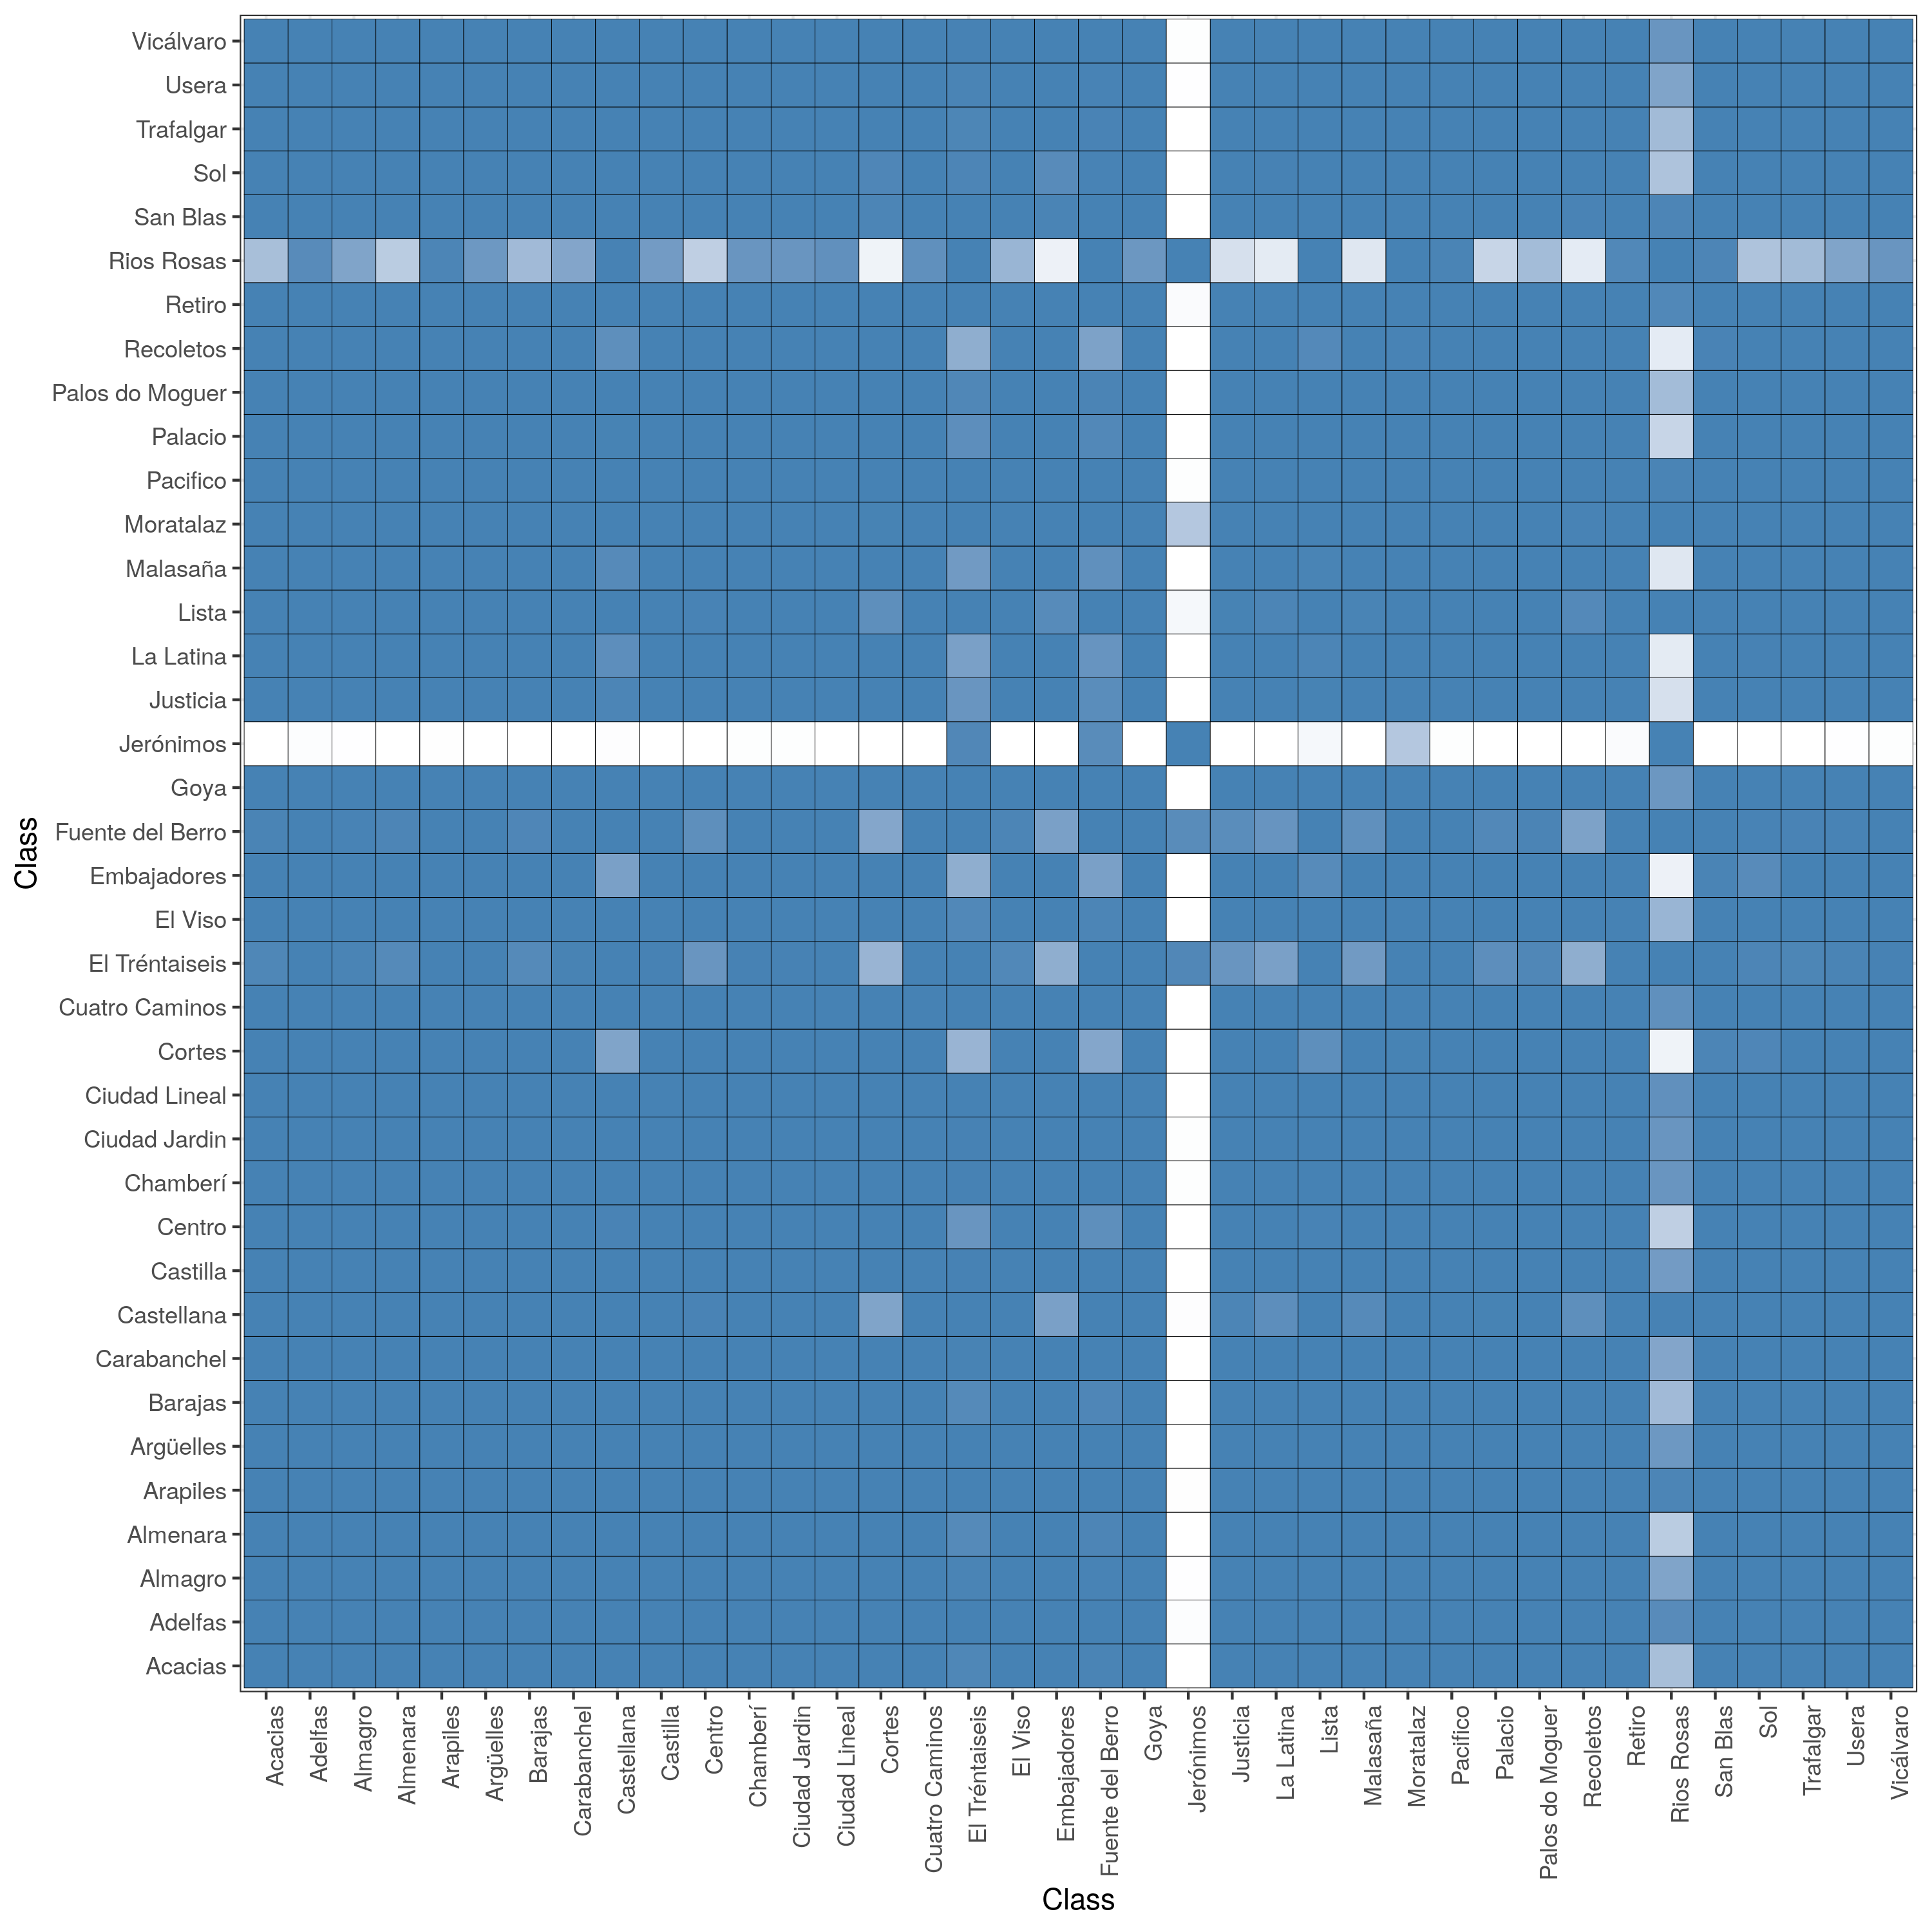

In [23]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")


Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.



---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




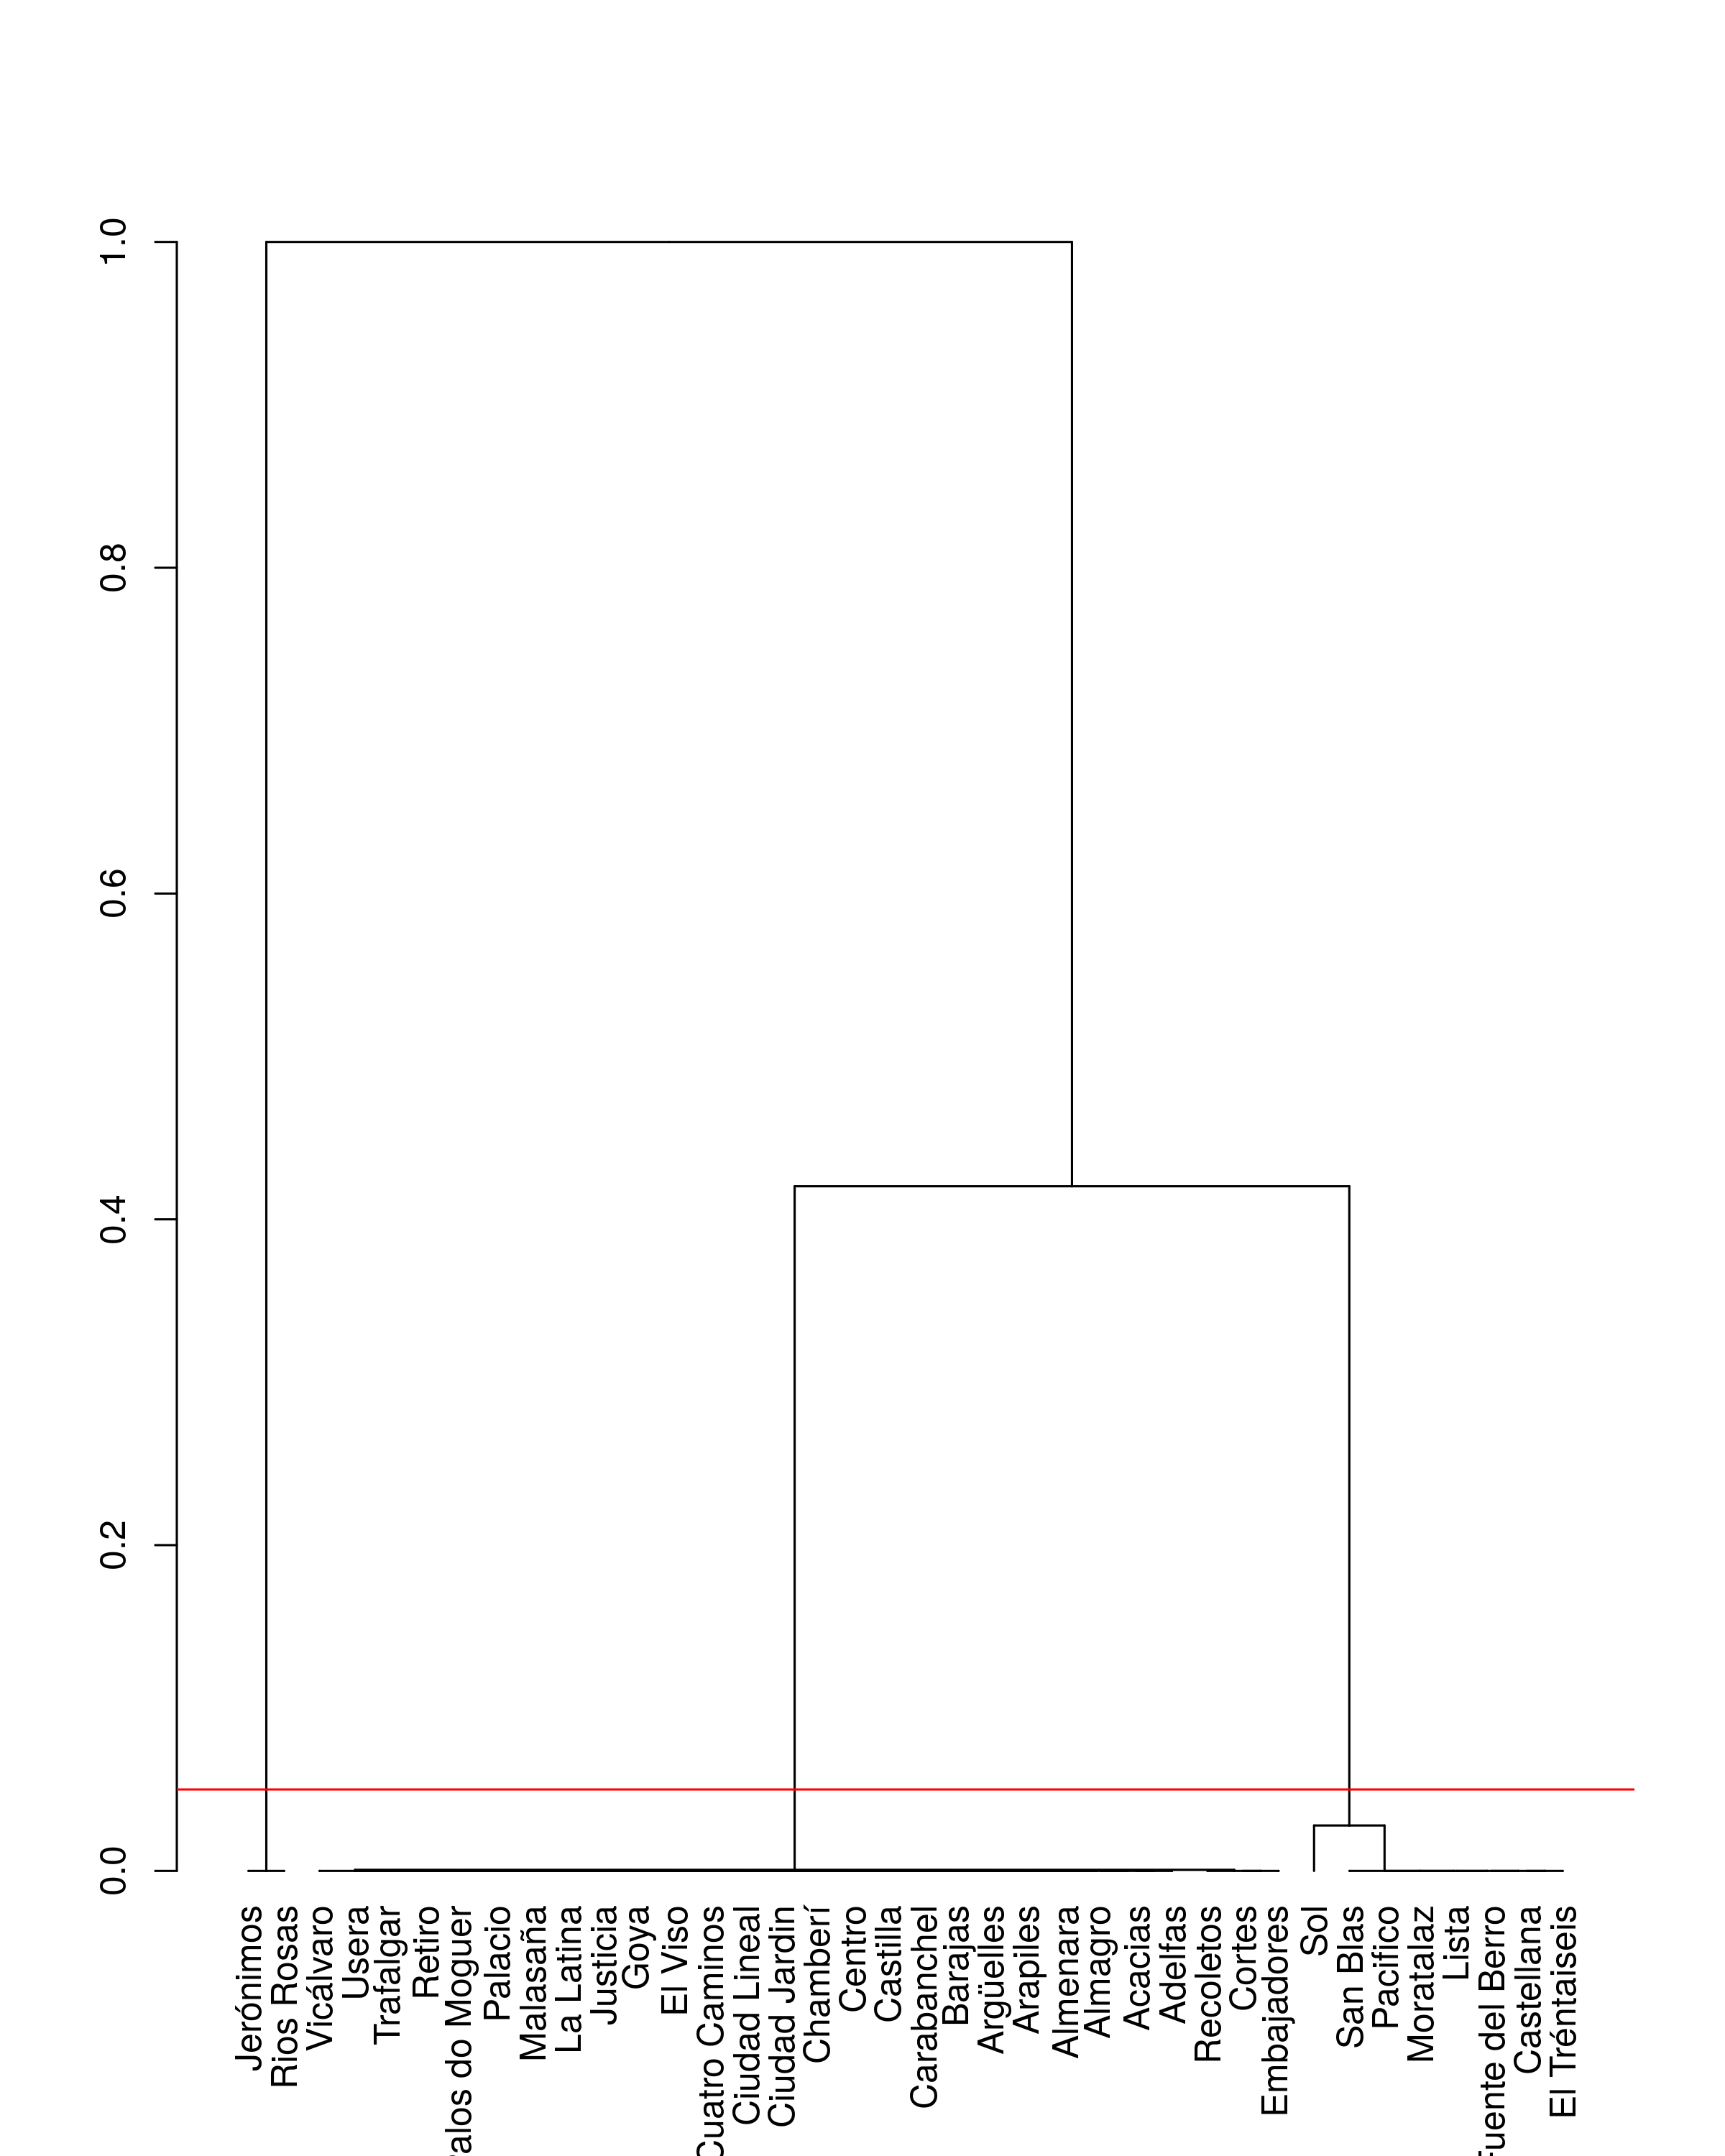

In [24]:
library(dendextend)
suppressPackageStartupMessages(library(dendextend))
options(repr.plot.height=10,repr.plot.width=8,repr.plot.res = 300)
d <- as.dist(1-resm)
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)
abline(h=0.05,col="red")

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

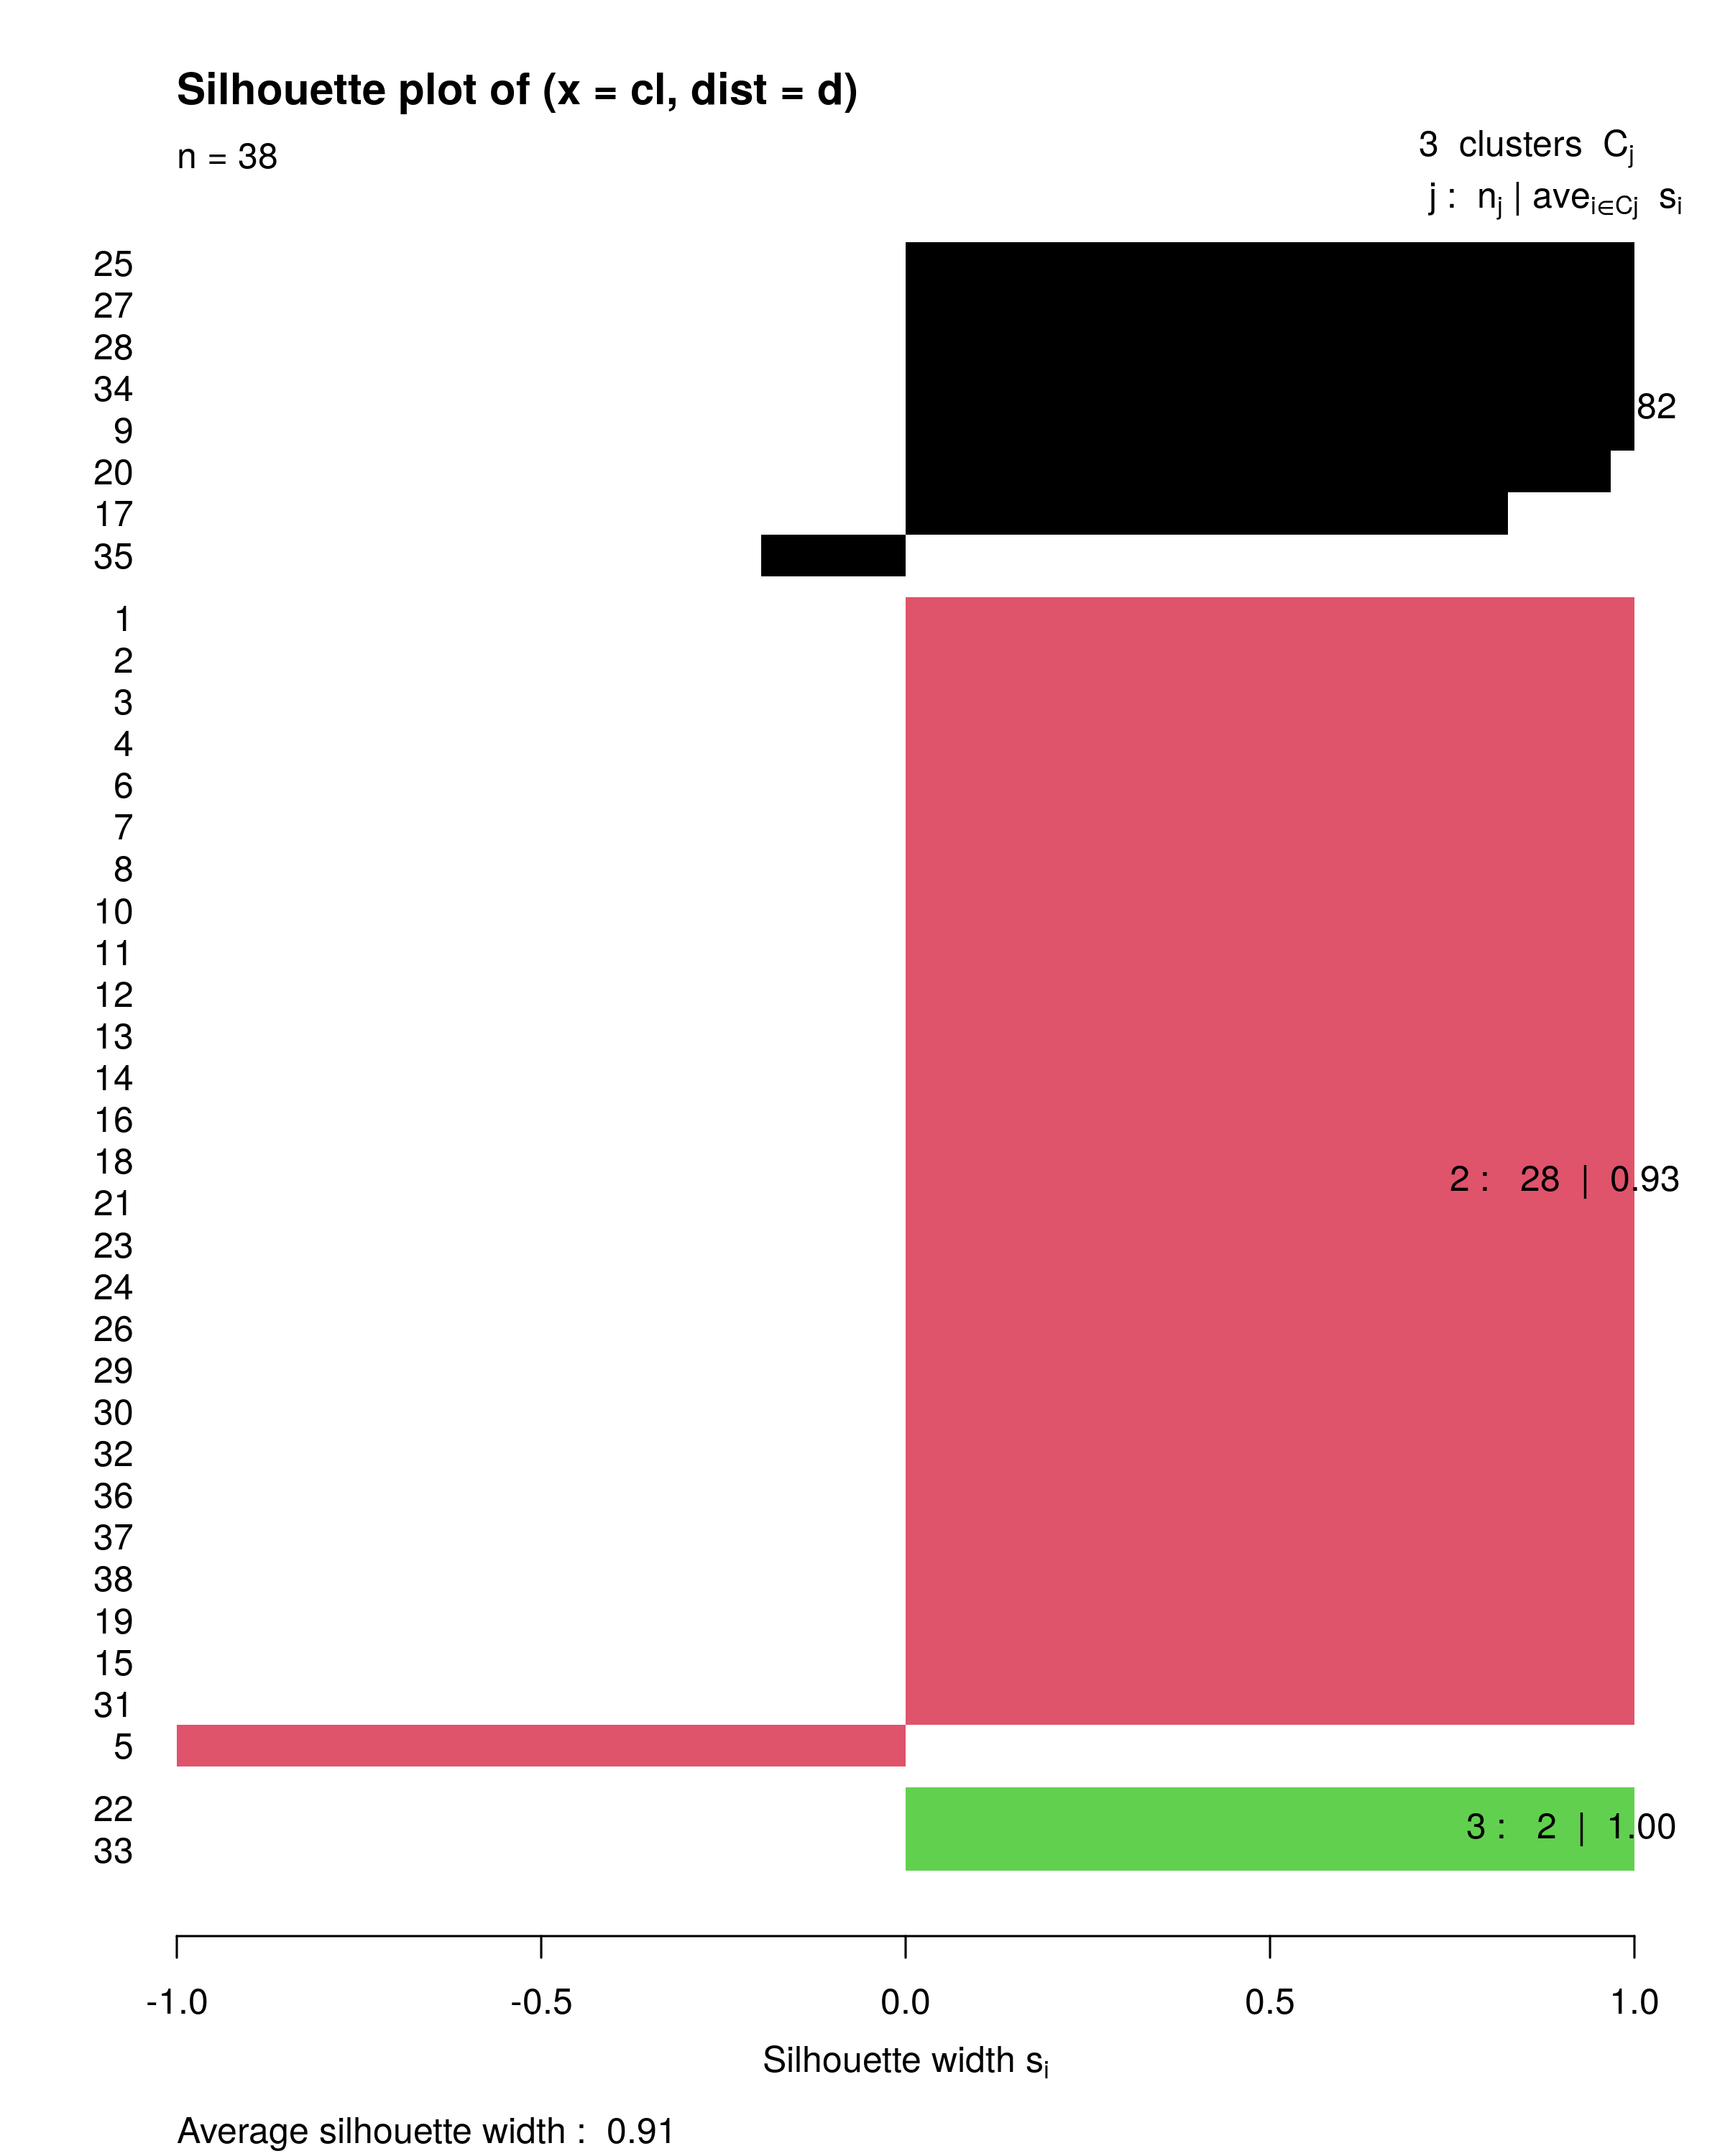

In [25]:
library(cluster)
cl <- cutree_1h.dendrogram(hcd,h=0.05)
ss<-silhouette(cl, d)
plot(ss,col=1:max(cl),border=NA)

In [26]:
#Si hacemos el corte más abajo en el dendrograma dejaríamos sol en un solo cluster

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [27]:
neighb_id <- cutree_1h.dendrogram(hcd,h=0.02)
neighb_id <- data.frame(neighb_id)

In [28]:
neighb_id <- cbind(Neighbourhood = rownames(neighb_id), neighb_id)


In [29]:
df_madrid <- merge(df_madrid, neighb_id)
head(df_madrid)

,Neighbourhood,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Acacias,Entire home/apt,4,1.0,2,4,70,0,4,15,91,40.40226,-3.703189,NA,3
2,Acacias,Entire home/apt,4,1.0,2,3,100,NA,1,0,NA,40.40540,-3.711909,NA,3
3,Acacias,Entire home/apt,8,3.0,4,7,140,NA,6,20,96,40.40249,-3.707083,NA,3
4,Acacias,Entire home/apt,2,1.0,1,1,120,NA,1,0,98,40.40376,-3.712270,NA,3
5,Acacias,Entire home/apt,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,NA,3
6,Acacias,Entire home/apt,2,1.0,0,1,22,NA,1,5,97,40.40504,-3.705093,NA,3


In [30]:
# vemos los valores en jeronimos
summary(df_madrid[df_madrid$Neighbourhood == 'Rios Rosas',])
print(nrow(df_madrid[df_madrid$Neighbourhood == 'Rios Rosas',]))

    Neighbourhood  Room.Type          Accommodates   Bathrooms    
 Rios Rosas:37    Length:37          Min.   :2     Min.   :1.000  
 Acacias   : 0    Class :character   1st Qu.:3     1st Qu.:1.000  
 Adelfas   : 0    Mode  :character   Median :4     Median :1.000  
 Almagro   : 0                       Mean   :4     Mean   :1.324  
 Almenara  : 0                       3rd Qu.:5     3rd Qu.:1.000  
 Aluche    : 0                       Max.   :8     Max.   :4.000  
 (Other)   : 0                                                    
    Bedrooms         Beds           Price         Square.Feet   Guests.Included
 Min.   :0.00   Min.   :1.000   Min.   : 40.00   Min.   :2153   Min.   :1.000  
 1st Qu.:1.00   1st Qu.:2.000   1st Qu.: 52.00   1st Qu.:2153   1st Qu.:1.000  
 Median :2.00   Median :2.000   Median : 65.00   Median :2153   Median :2.000  
 Mean   :1.73   Mean   :2.405   Mean   : 83.54   Mean   :2153   Mean   :1.865  
 3rd Qu.:2.00   3rd Qu.:3.000   3rd Qu.: 88.00   3rd Qu.:2153   

[1] 37


In [31]:
# vemos los valores en jeronimos
summary(df_madrid[df_madrid$Neighbourhood == 'Jerónimos',])
print(nrow(df_madrid[df_madrid$Neighbourhood == 'Jerónimos',]))

   Neighbourhood  Room.Type          Accommodates      Bathrooms    
 Jerónimos:33    Length:33          Min.   : 2.000   Min.   :1.000  
 Acacias  : 0    Class :character   1st Qu.: 4.000   1st Qu.:1.000  
 Adelfas  : 0    Mode  :character   Median : 4.000   Median :2.000  
 Almagro  : 0                       Mean   : 4.848   Mean   :1.742  
 Almenara : 0                       3rd Qu.: 6.000   3rd Qu.:2.000  
 Aluche   : 0                       Max.   :16.000   Max.   :5.000  
 (Other)  : 0                                                       
    Bedrooms          Beds            Price        Square.Feet  
 Min.   :0.000   Min.   : 1.000   Min.   : 42.0   Min.   : 700  
 1st Qu.:1.000   1st Qu.: 2.000   1st Qu.: 80.0   1st Qu.:1817  
 Median :2.000   Median : 3.000   Median :125.0   Median :2934  
 Mean   :1.909   Mean   : 3.182   Mean   :154.5   Mean   :2934  
 3rd Qu.:2.000   3rd Qu.: 4.000   3rd Qu.:205.0   3rd Qu.:4050  
 Max.   :5.000   Max.   :13.000   Max.   :536.0   Max.   :

[1] 33


In [32]:
# en ambos barrios se observa que hay tan solo 1 o dos valores de square meters, no será posible realizar un modelo con esa cantiddad de datos
# Se eliminan del dataframe
df_madrid <- filter(df_madrid, !neighb_id %in% 4)

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [33]:
df_madrid$neighb_id <- as.factor(df_madrid$neighb_id)
df_madrid$Room.Type <- as.factor(df_madrid$Room.Type)

In [34]:
summary(df_madrid)
nrow(df_madrid)

     Neighbourhood            Room.Type     Accommodates      Bathrooms   
 Malasaña   : 679   Entire home/apt:4831   Min.   : 1.000   Min.   :0.00  
 Embajadores: 585                          1st Qu.: 3.000   1st Qu.:1.00  
 La Latina  : 571                          Median : 4.000   Median :1.00  
 Sol        : 536                          Mean   : 4.087   Mean   :1.24  
 Cortes     : 441                          3rd Qu.: 5.000   3rd Qu.:1.00  
 Justicia   : 384                          Max.   :16.000   Max.   :6.00  
 (Other)    :1635                                           NA's   :14    
    Bedrooms           Beds           Price         Square.Feet    
 Min.   : 0.000   Min.   : 1.00   Min.   : 18.00   Min.   :   0.0  
 1st Qu.: 1.000   1st Qu.: 1.00   1st Qu.: 59.00   1st Qu.:   0.0  
 Median : 1.000   Median : 2.00   Median : 75.00   Median : 323.0  
 Mean   : 1.415   Mean   : 2.36   Mean   : 90.01   Mean   : 386.1  
 3rd Qu.: 2.000   3rd Qu.: 3.00   3rd Qu.:100.00   3rd Qu.: 

[1] 4831

In [35]:
colnames(df_madrid)

[1] "Neighbourhood"        "Room.Type"            "Accommodates"        
 [4] "Bathrooms"            "Bedrooms"             "Beds"                
 [7] "Price"                "Square.Feet"          "Guests.Included"     
[10] "Extra.People"         "Review.Scores.Rating" "Latitude"            
[13] "Longitude"            "Square.Meters"        "neighb_id"

In [36]:
#elimino la columna de review scores porque tiene muchos nas
df_madrid_model <- subset(df_madrid, select = -c(Square.Feet,Latitude,Longitude,Room.Type,Review.Scores.Rating))
# df_madrid_model <- subset(df_madrid, select = -c(Square.Feet,Latitude,Longitude,Room.Type))
summary(df_madrid_model)


     Neighbourhood   Accommodates      Bathrooms       Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.00   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.00   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.00   Median : 1.000  
 Sol        : 536   Mean   : 4.087   Mean   :1.24   Mean   : 1.415  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.00   Max.   :10.000  
 (Other)    :1635                    NA's   :14     NA's   :7       
      Beds           Price        Guests.Included   Extra.People    
 Min.   : 1.00   Min.   : 18.00   Min.   : 1.000   Min.   :  0.000  
 1st Qu.: 1.00   1st Qu.: 59.00   1st Qu.: 1.000   1st Qu.:  0.000  
 Median : 2.00   Median : 75.00   Median : 2.000   Median : 10.000  
 Mean   : 2.36   Mean   : 90.01   Mean   : 1.956   Mean   :  9.032  
 3rd Qu.: 3.00   3rd Qu.:100.00   3rd Qu.: 2.000   3rd Qu.: 15.000  
 Max.   :16.00   Max.   :800.00   

In [37]:
df_madrid_model <- df_madrid_model %>% drop_na(Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,neighb_id)
# df_madrid_model <- subset(df_madrid_model, (!is.na(df_madrid_model['Square.Meters'])))
nrow(df_madrid_model)

[1] 4802

In [38]:
set.seed(12)

idx<-sample(1:nrow(df_madrid_model),nrow(df_madrid_model)*0.9)

df_madrid_train=df_madrid_model[idx,]
df_madrid_test=df_madrid_model[-idx,]

In [39]:
# compruebo que hay en train y test elementos de todos los clusters
df_madrid_train %>% group_by(neighb_id) %>% summarise(non_na_train = sum(!is.na(Square.Meters)))
df_madrid_test %>% group_by(neighb_id) %>% summarise(non_na_test = sum(!is.na(Square.Meters)))

neighb_id,non_na_train
<fct>,<int>
1,11
2,25
3,113


neighb_id,non_na_test
<fct>,<int>
1,1
2,3
3,14


In [40]:
lm_model<-lm(Square.Meters~
             Accommodates+Bathrooms+Bedrooms+Beds+Price+Guests.Included+Extra.People+neighb_id, data=df_madrid_train, na.action=na.omit)

summary(lm_model)


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Extra.People + neighb_id, 
    data = df_madrid_train, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.960 -10.981  -1.336   9.229  85.033 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      37.07943    9.05907   4.093 7.18e-05 ***
Accommodates      0.59298    1.65927   0.357   0.7214    
Bathrooms        11.94388    4.80288   2.487   0.0141 *  
Bedrooms         15.16311    2.97051   5.105 1.07e-06 ***
Beds              1.38801    1.93164   0.719   0.4736    
Price             0.04495    0.03054   1.472   0.1433    
Guests.Included  -2.95345    1.65315  -1.787   0.0762 .  
Extra.People      0.21186    0.18510   1.145   0.2543    
neighb_id2       -9.97237    7.91677  -1.260   0.2099    
neighb_id3      -17.44273    7.01441  -2.487   0.0141 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 

In [41]:
lm_yp_train<-predict(lm_model,df_madrid_train,na.action = na.omit)
caret::postResample(pred=lm_yp_train, obs=df_madrid_train$Square.Meters)


RMSE  Rsquared       MAE 
       NA 0.6360401        NA

In [42]:
lm_yp_test<-predict(lm_model,df_madrid_test,na.action = na.omit)
caret::postResample(pred=lm_yp_test, obs=df_madrid_test$Square.Meters)

RMSE  Rsquared       MAE 
       NA 0.7461002        NA

In [43]:
#compruebo si un modelo generalizado mejora el resultado

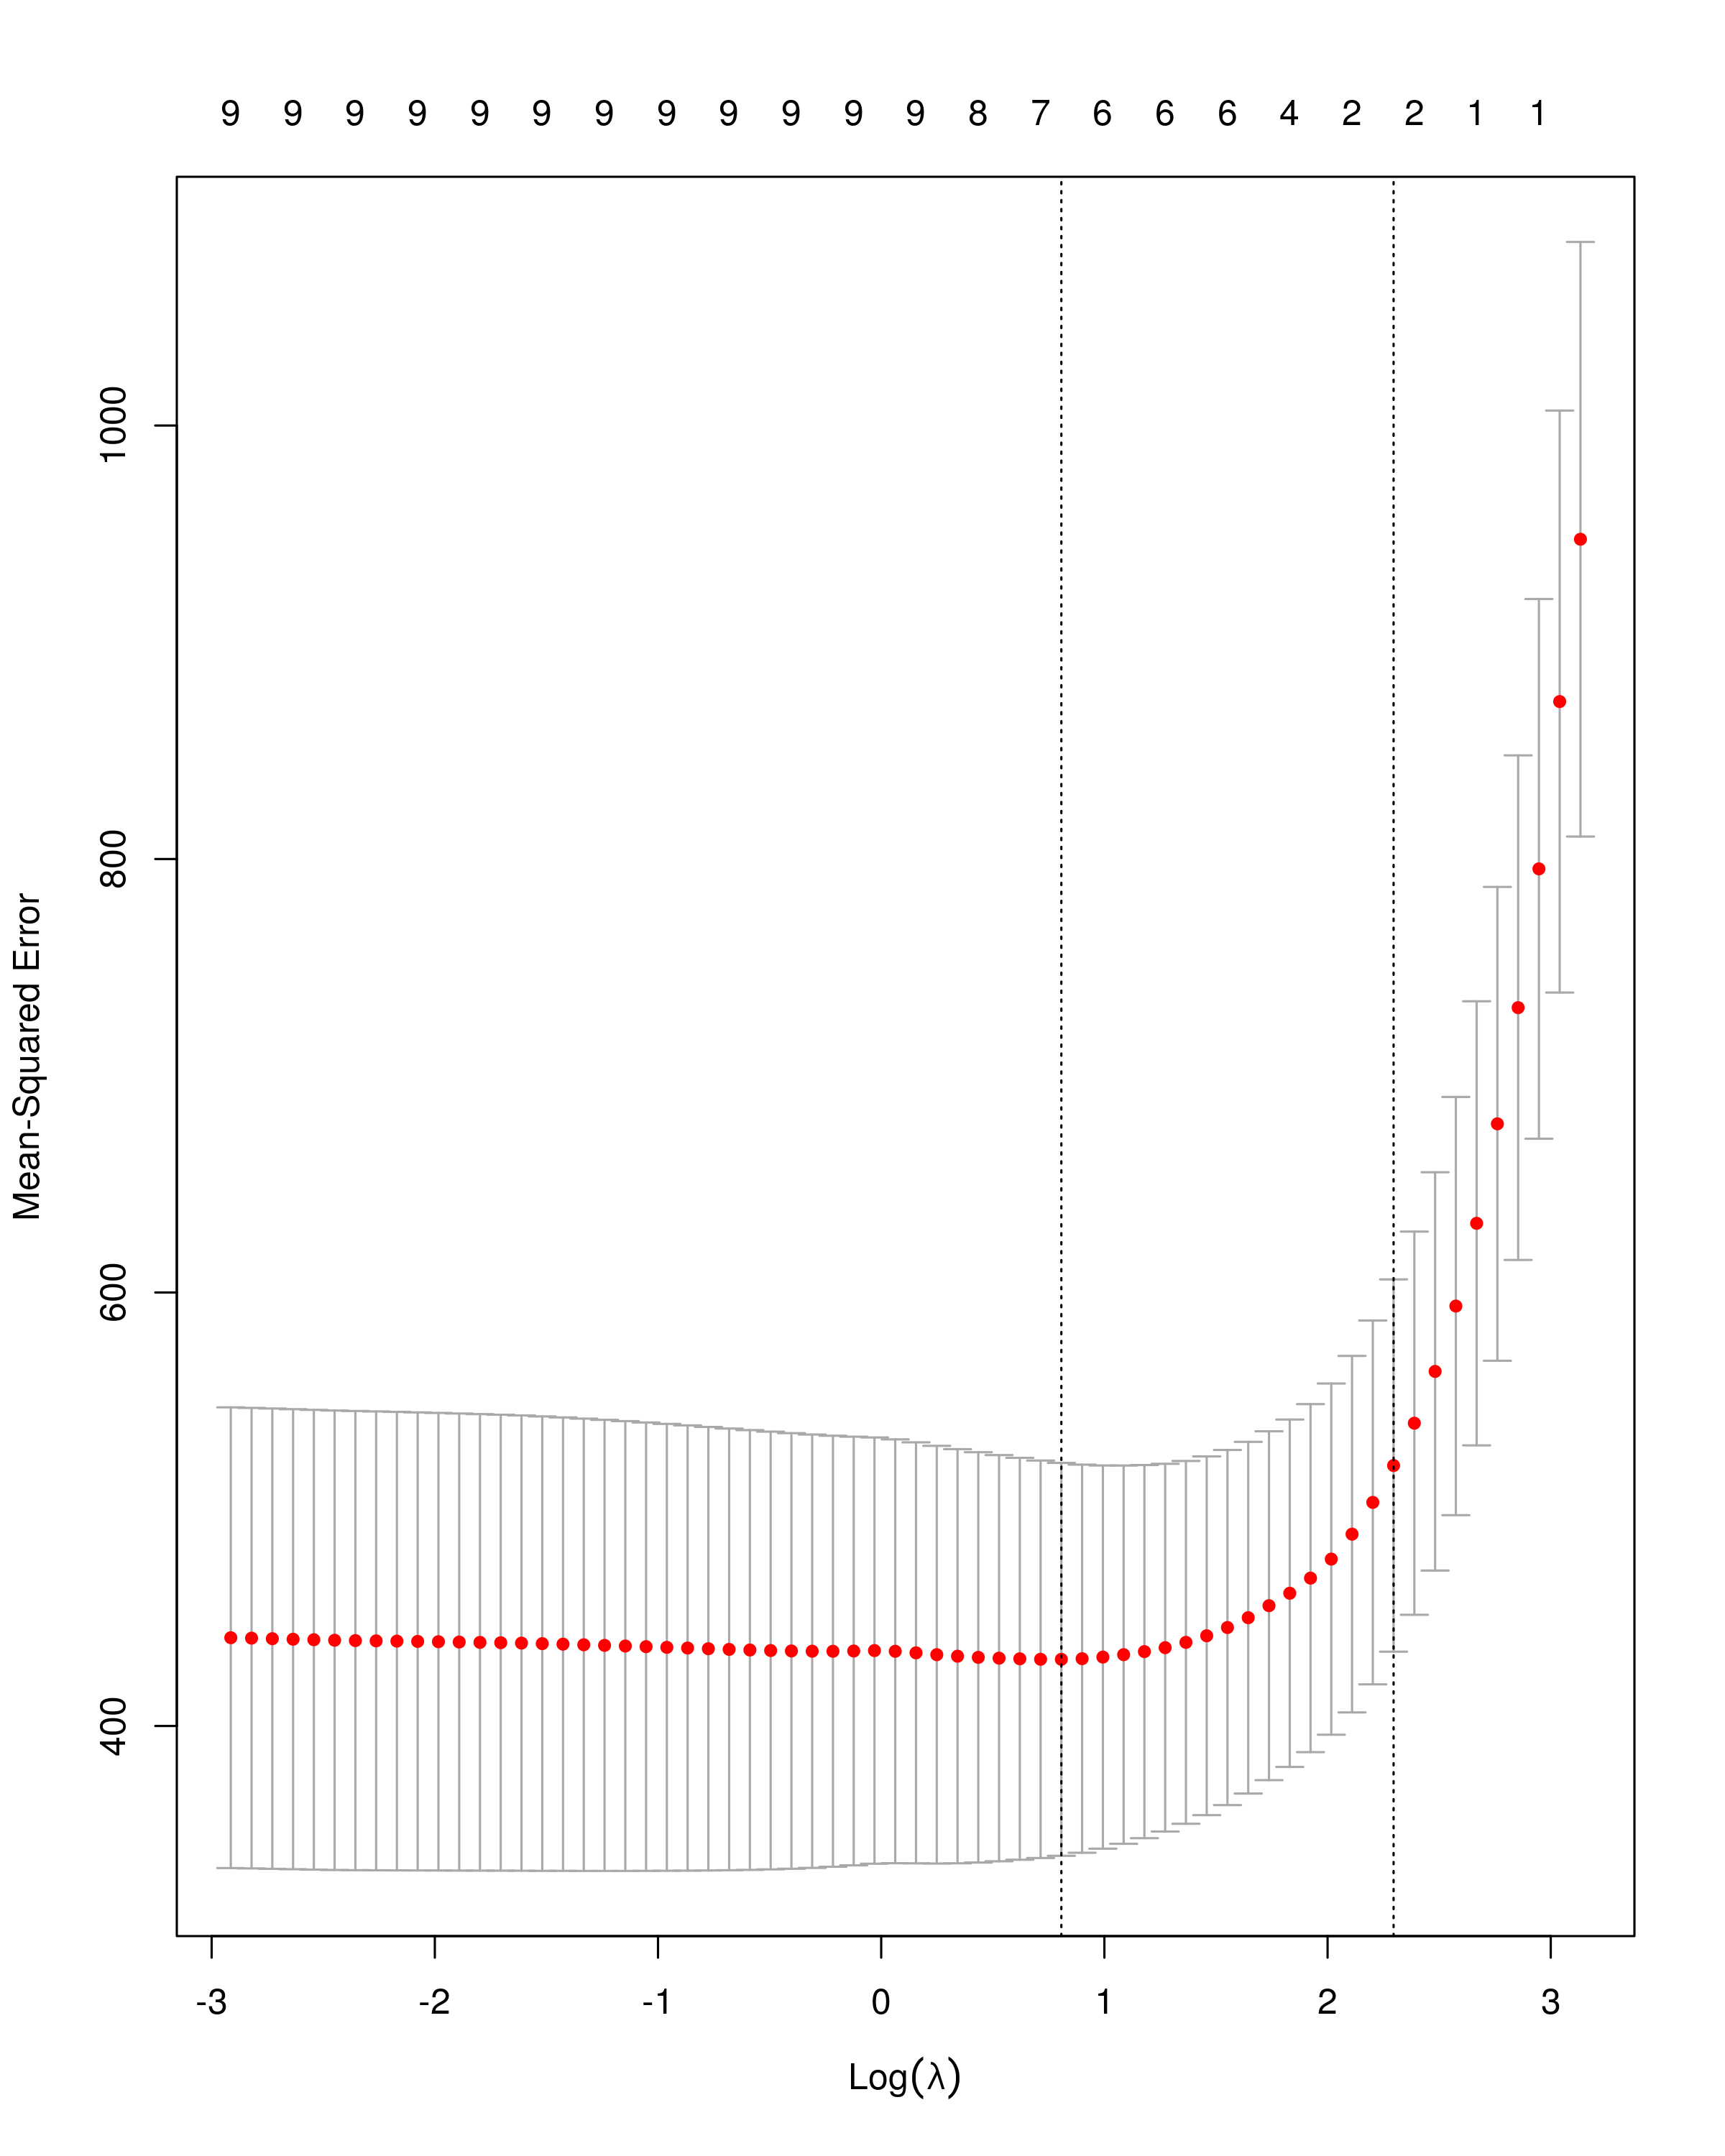

In [44]:
glm_model<-glmnetUtils::cv.glmnet(formula=Square.Meters~
                           Accommodates+Bathrooms+Bedrooms+Beds+Price+Guests.Included+Extra.People+neighb_id, 
                           data=df_madrid_train,alpha=1,
                           nfold= 10,
                           type.measure="mse",
                           standardize = T,
                            na.action=na.omit)

plot(glm_model)



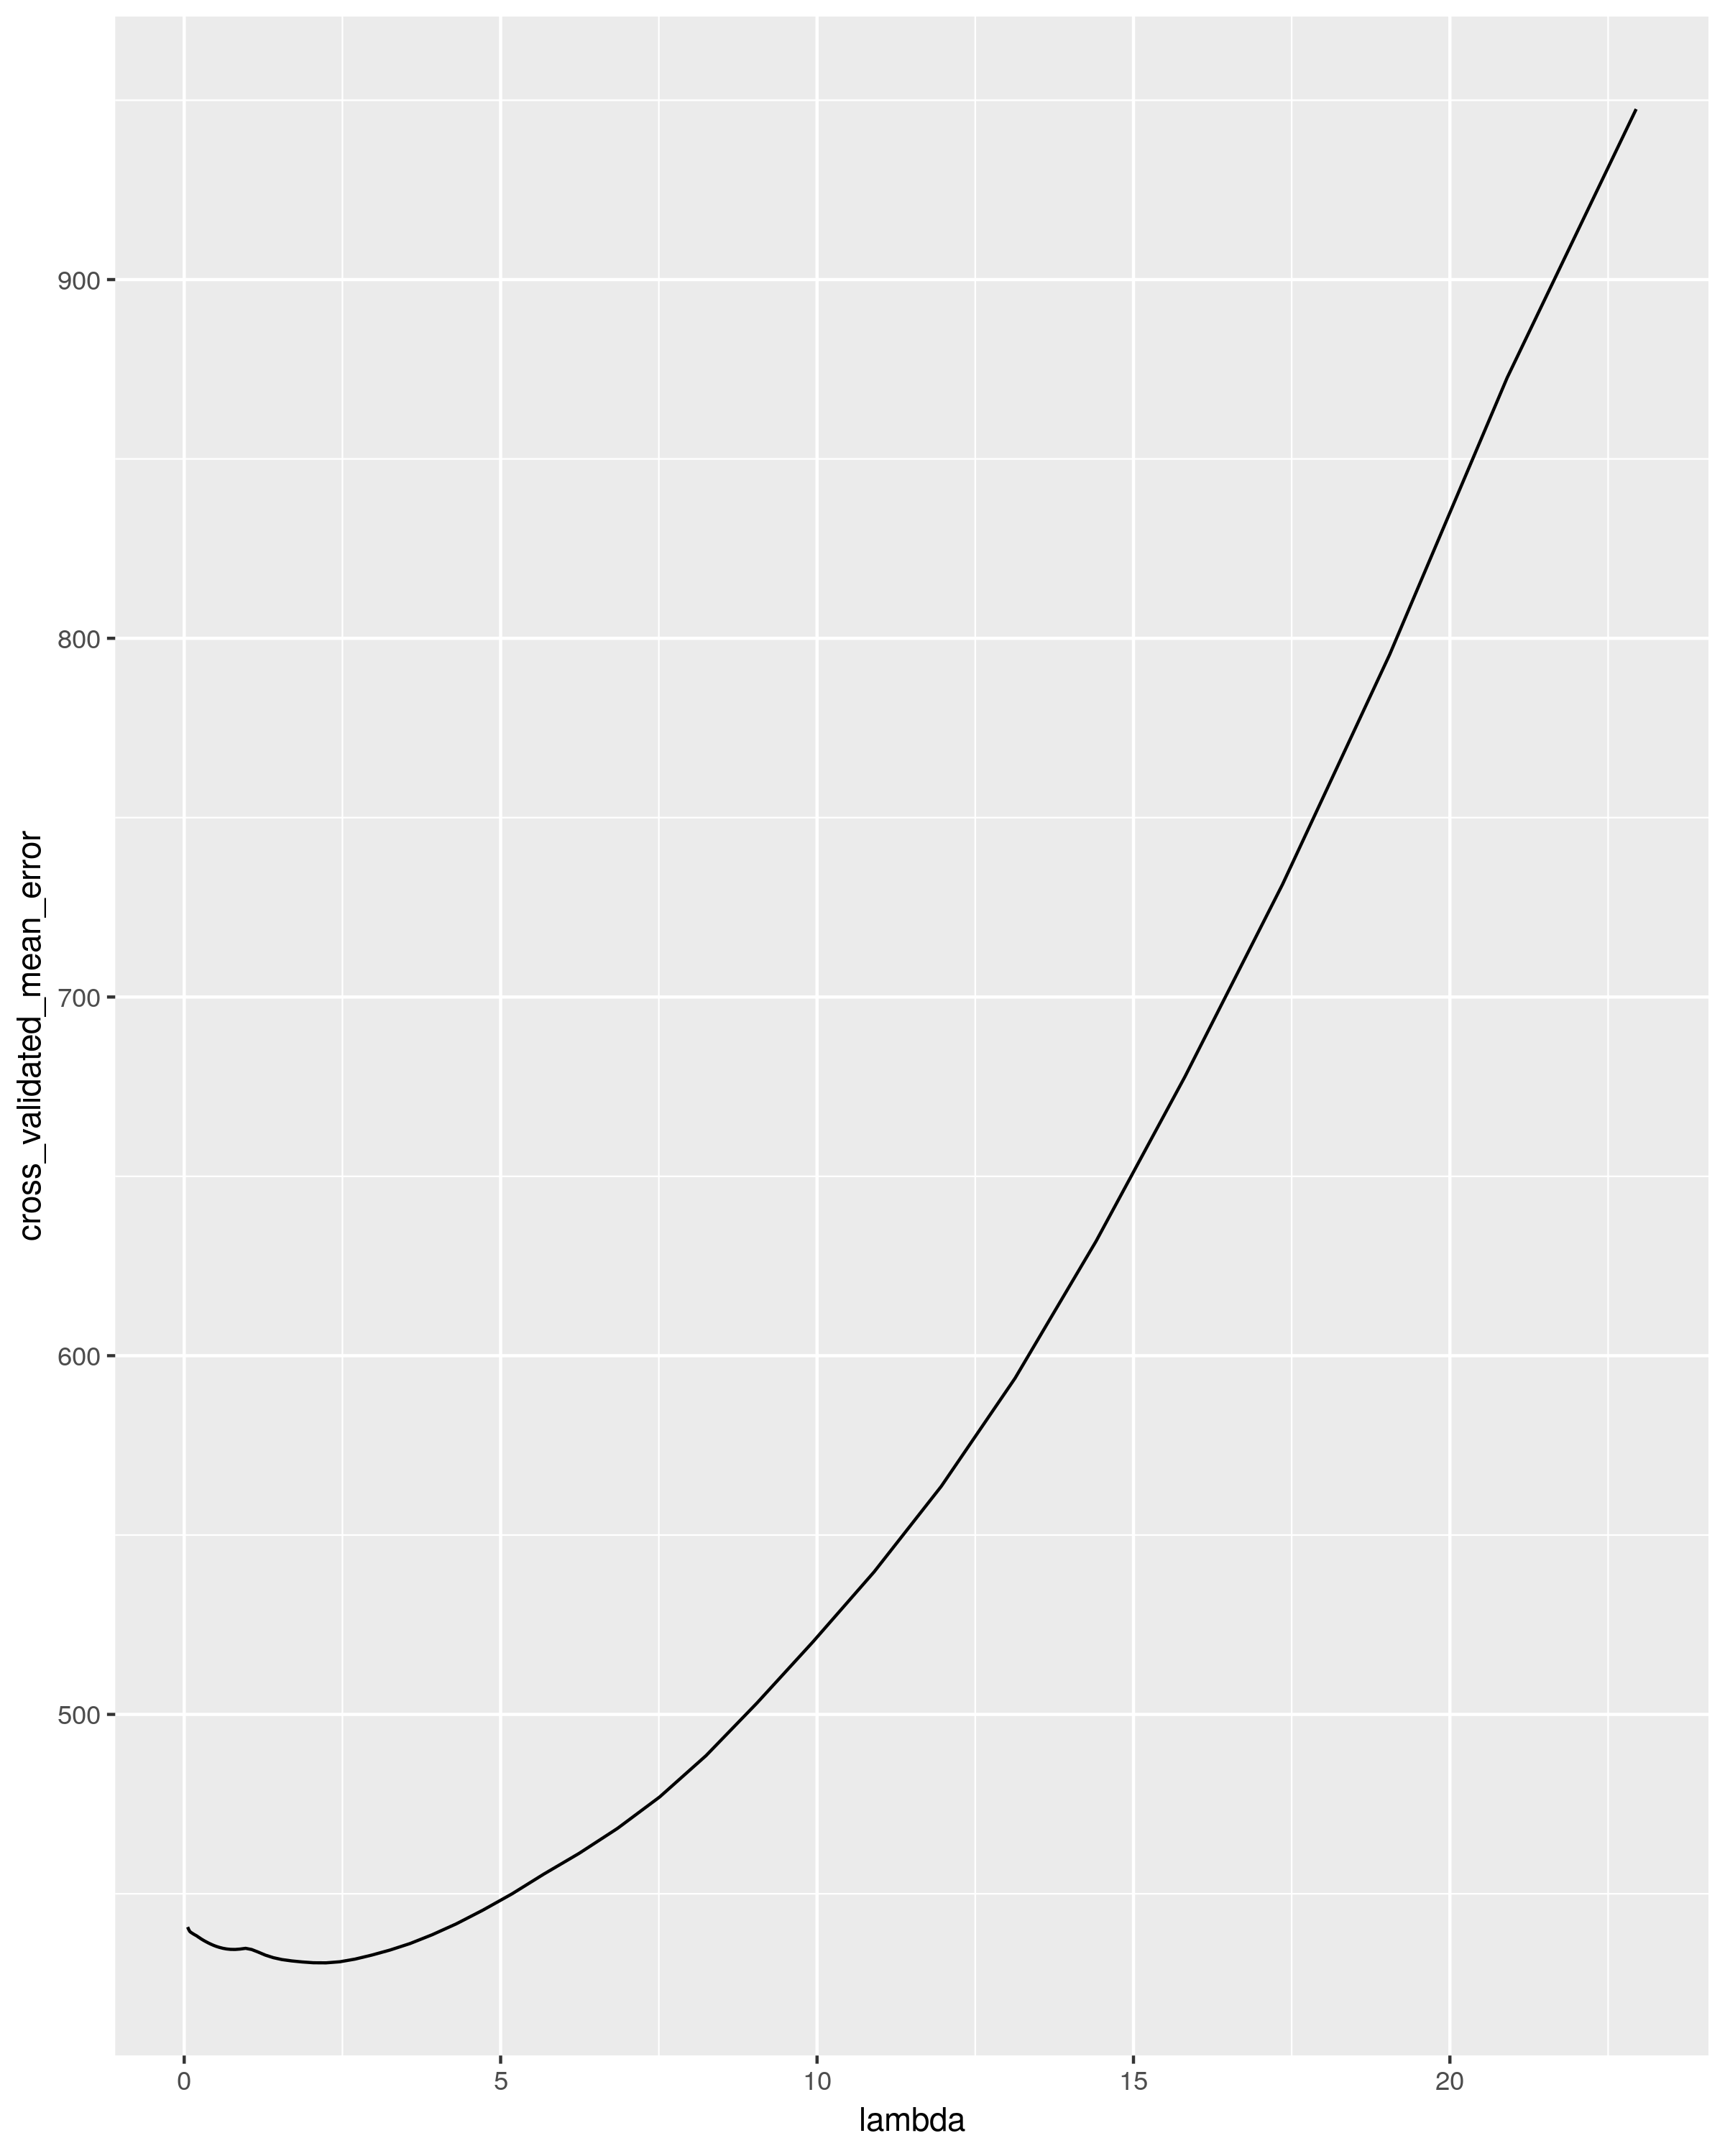

In [45]:
ggplot(data.frame(lambda=glm_model$lambda,cross_validated_mean_error=glm_model$cvm),
       aes(x=lambda,y=cross_validated_mean_error))+geom_line()

In [46]:
paste0("El valor lambda con el menor error es:",glm_model$lambda.min)
paste0("El valor lambda más alto que se encuentra a una distancia 1sd es:",glm_model$lambda.1se)
paste0("El R^2 estimado es", glm_model$glmnet.fit$dev.ratio[which(glm_model$glmnet.fit$lambda == glm_model$lambda.1se)]) 
# ggplot(data.frame(lambda=cv$lambda,r2=cv$glmnet.fit$dev.ratio),
#        aes(x=lambda,y=r2))+geom_line()+xlim(0,1)

[1] "El valor lambda con el menor error es:2.24158304831523"

[1] "El valor lambda más alto que se encuentra a una distancia 1sd es:9.93160595282176"

[1] "El R^2 estimado es0.463439125902966"

In [47]:
reg_yp_train <- predict(glm_model,
                     df_madrid_train, 
                     s=glm_model$lambda.min)
caret::postResample(reg_yp_train,df_madrid_train$Square.Meters)

RMSE  Rsquared       MAE 
       NA 0.6218332        NA

In [48]:
reg_yp_test <- predict(glm_model,
                     df_madrid_test, 
                     s=glm_model$lambda.min)
caret::postResample(reg_yp_test,df_madrid_test$Square.Meters)

RMSE  Rsquared       MAE 
       NA 0.7863794        NA

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

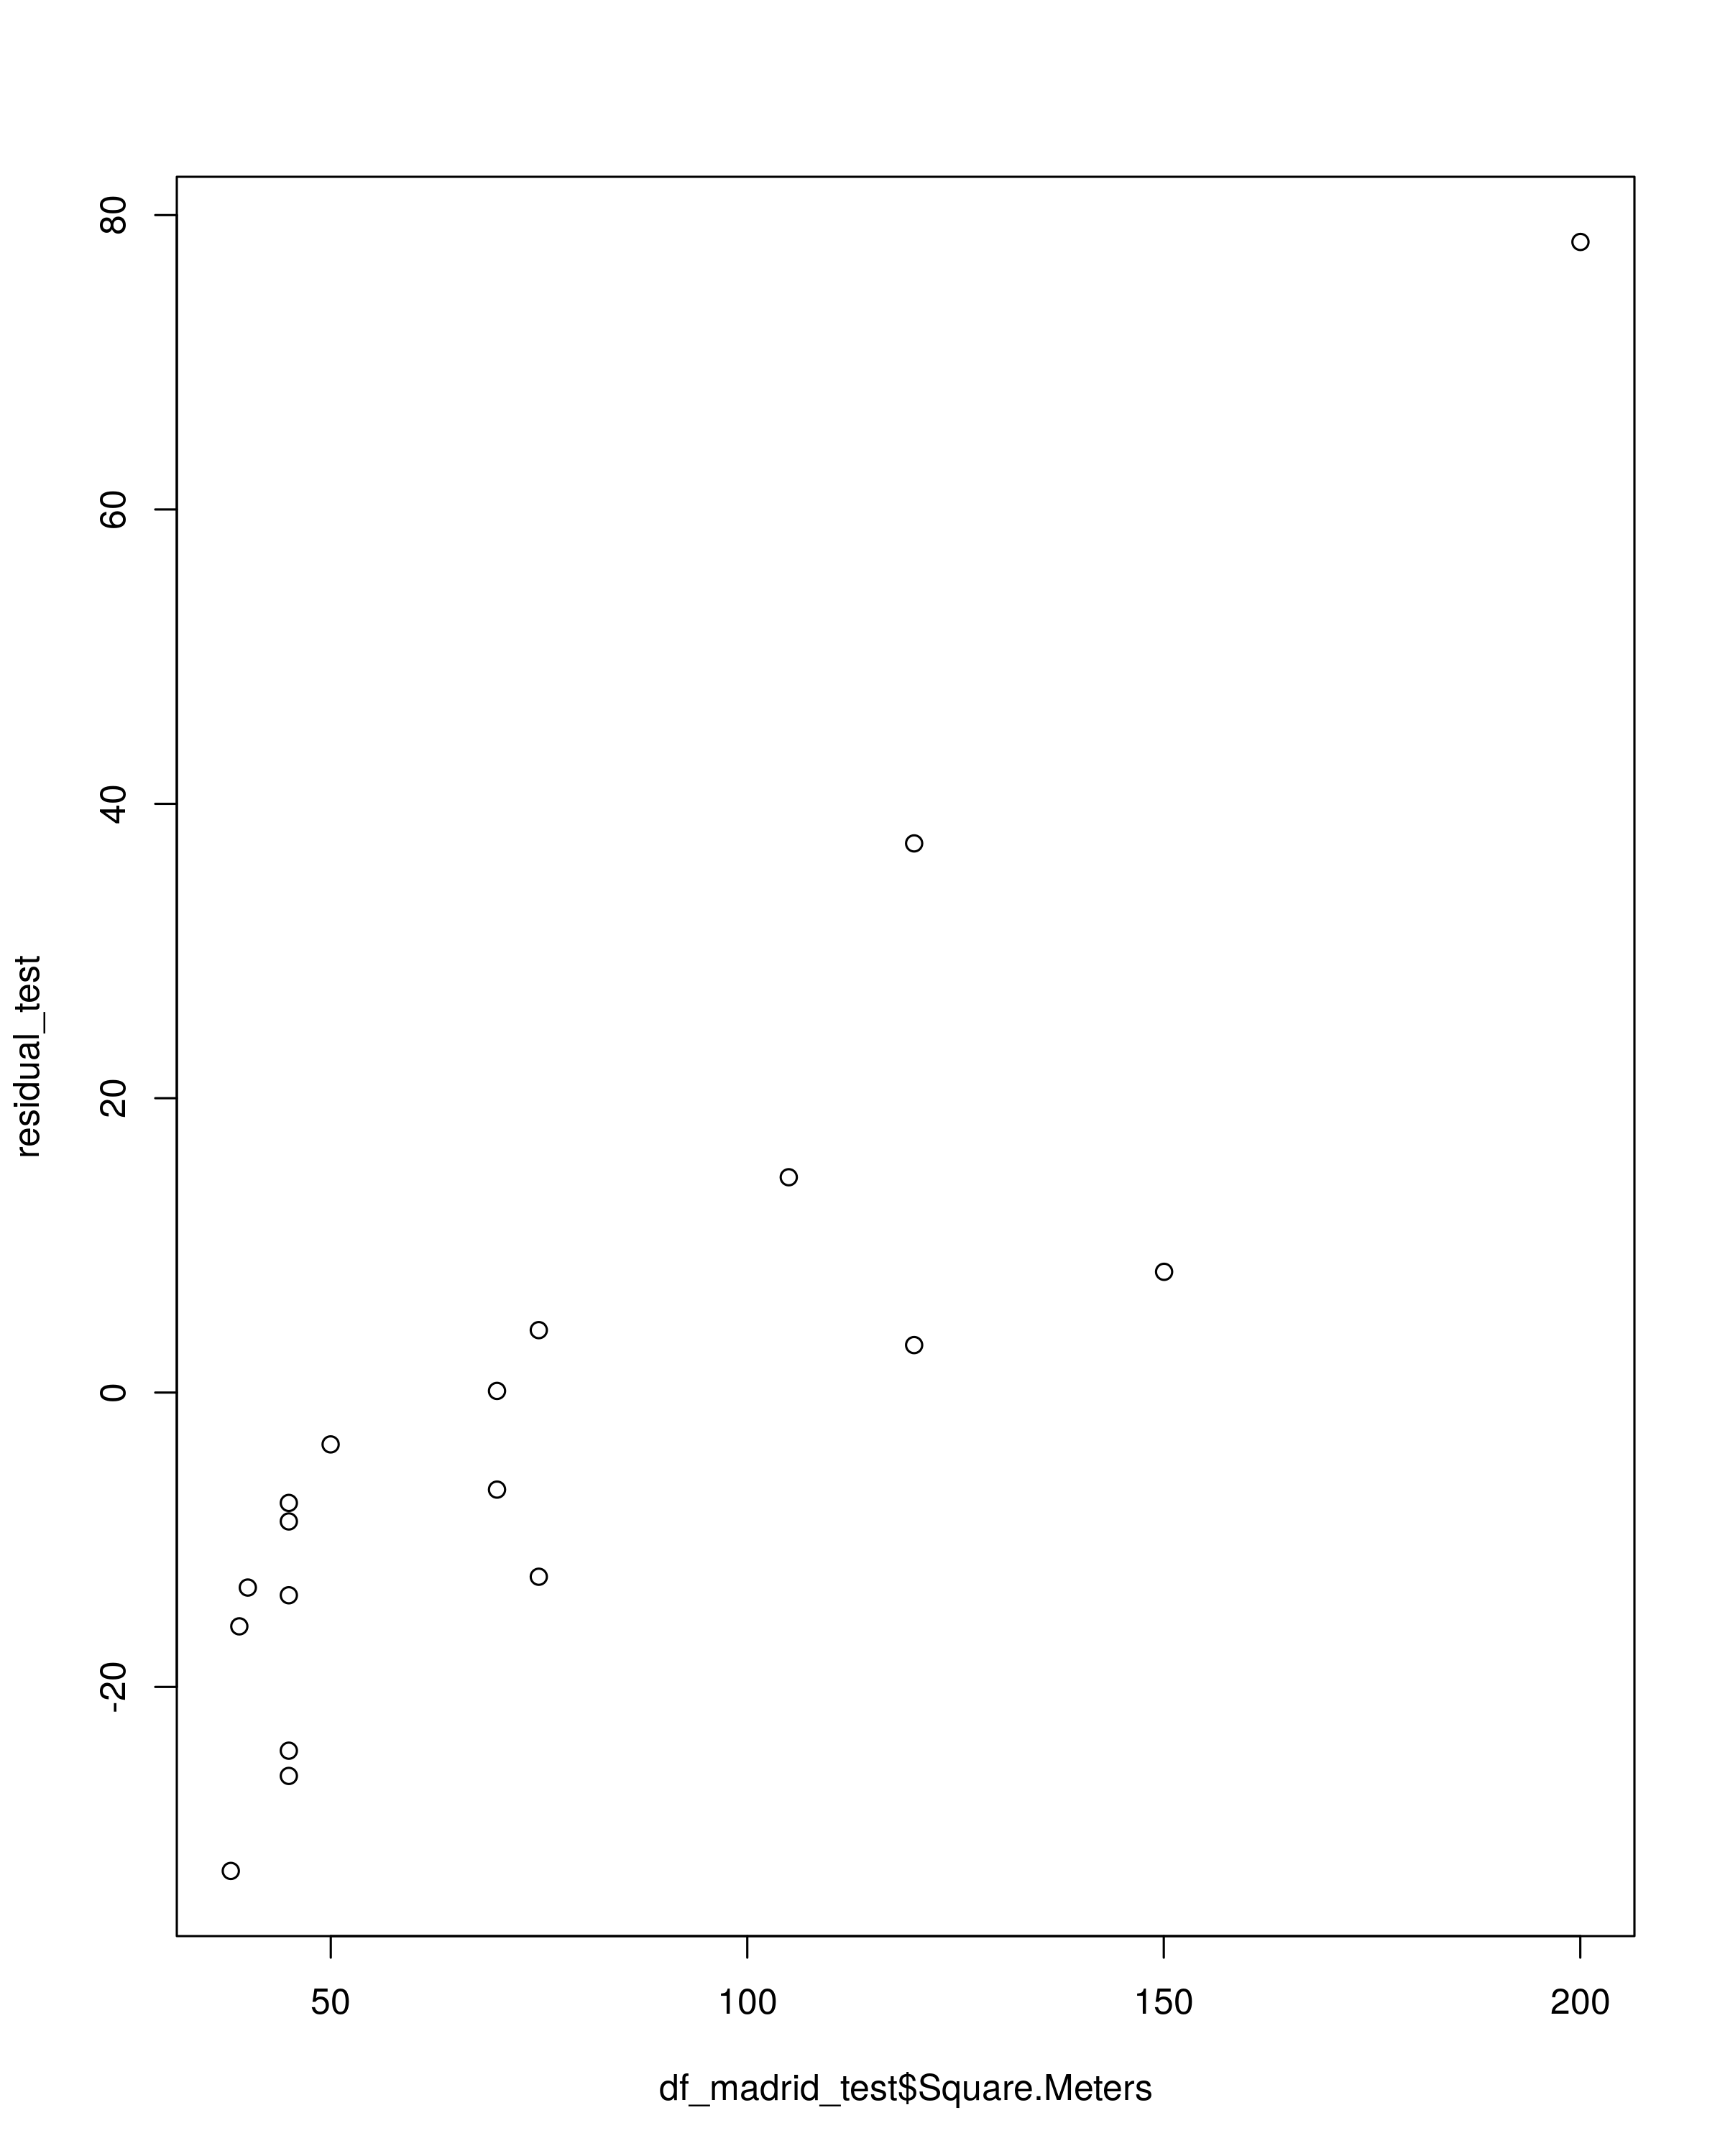

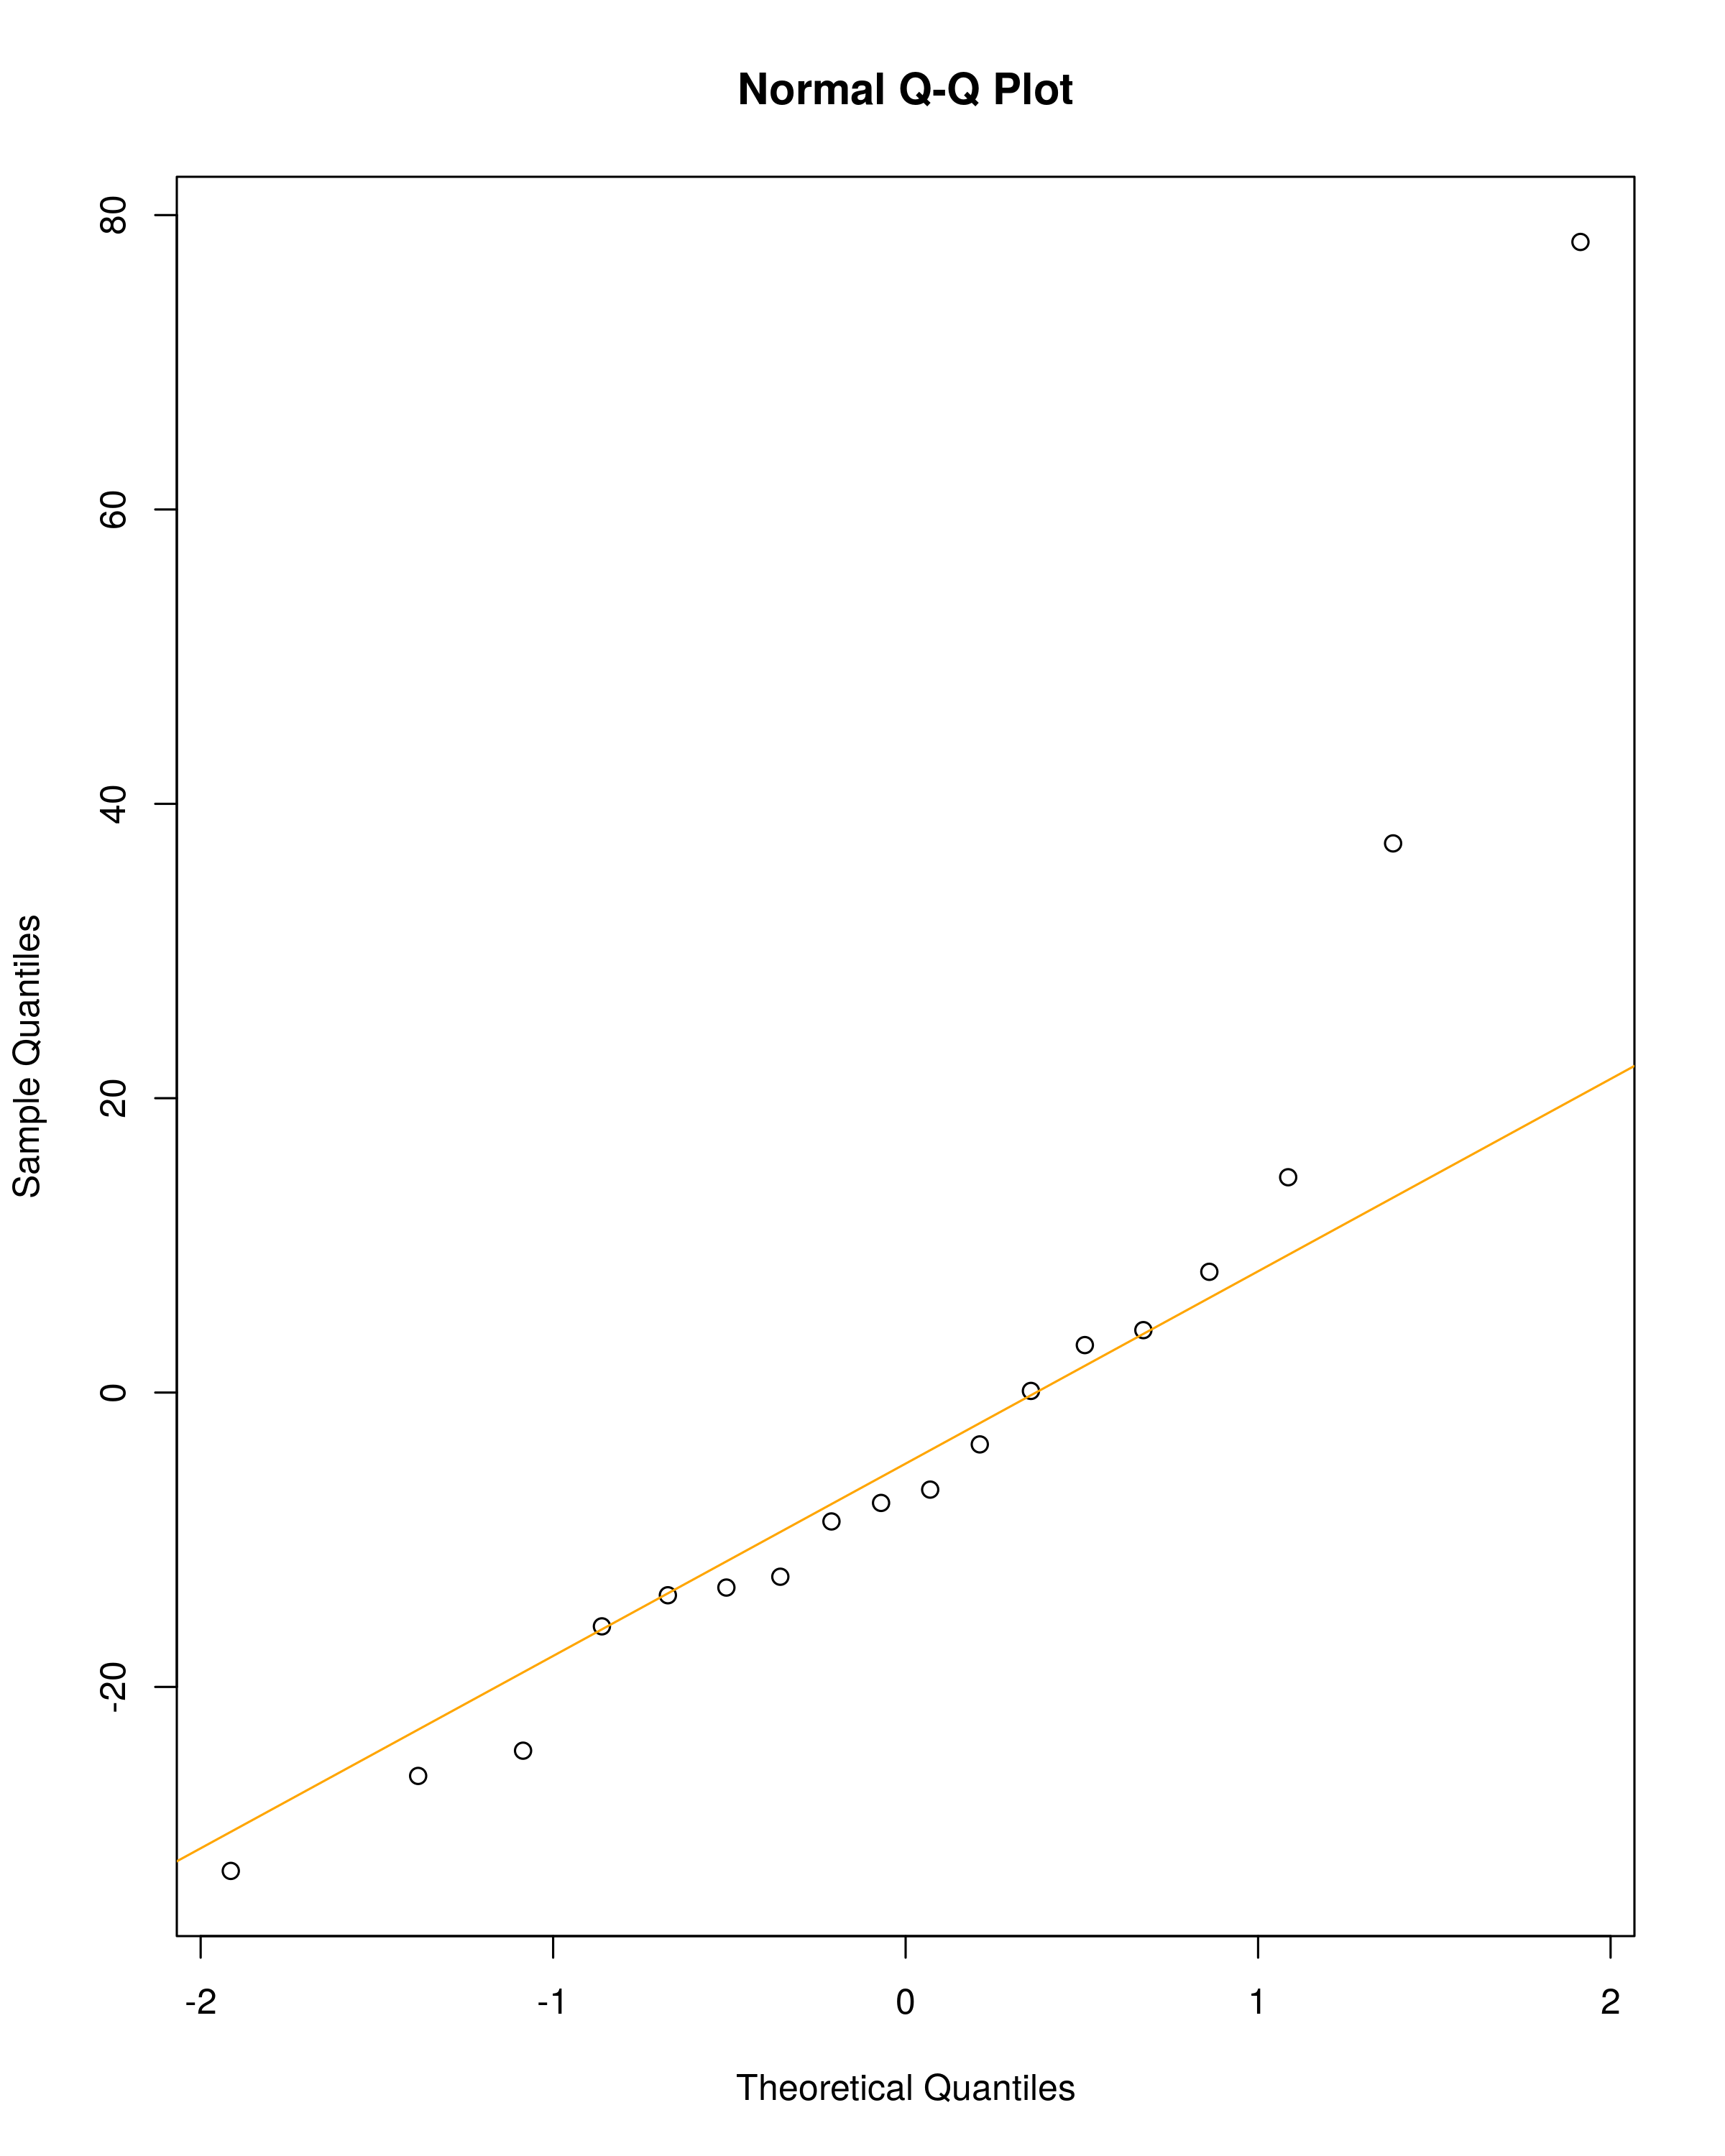

In [49]:
residual_test <- df_madrid_test$Square.Meters-reg_yp_test
plot(df_madrid_test$Square.Meters,residual_test)
qqnorm(residual_test)
qqline(residual_test,col="orange")

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [50]:
new_data <- df_madrid_test[1,]
new_data$Neighbourhood <- 'Sol'
new_data$Accommodates <- 6
new_data$Bathrooms <- 1
new_data$Bedrooms <- 3
new_data$Beds <- 3
new_data$Price <- 80
new_data$Guests.Included <- 6

In [51]:
new_data

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Square.Meters,neighb_id
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
13,Sol,6,1,3,3,80,6,0,NA,3


In [52]:
sqm <- predict(glm_model,new_data,s=glm_model$lambda.min,na.action = na.omit)
sqm

,s1
13,86.27839


In [53]:
new_data$Bedrooms <- 4
sqm <- predict(glm_model,new_data,s=glm_model$lambda.min,na.action = na.omit)
sqm

,s1
13,102.0926


In [54]:
#Predice 86 m2 y añade 14 m2 por una habitación adicional

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [55]:
df_madrid[which(is.na(df_madrid$Square.Meters)),'Square.Meters'] <- predict(glm_model,
                                                                         df_madrid[which(is.na(df_madrid$Square.Meters)),], 
                                                                         s=glm_model$lambda.min,
                                                                         na.action = na.pass)


In [56]:
summary(df_madrid)

     Neighbourhood            Room.Type     Accommodates      Bathrooms   
 Malasaña   : 679   Entire home/apt:4831   Min.   : 1.000   Min.   :0.00  
 Embajadores: 585                          1st Qu.: 3.000   1st Qu.:1.00  
 La Latina  : 571                          Median : 4.000   Median :1.00  
 Sol        : 536                          Mean   : 4.087   Mean   :1.24  
 Cortes     : 441                          3rd Qu.: 5.000   3rd Qu.:1.00  
 Justicia   : 384                          Max.   :16.000   Max.   :6.00  
 (Other)    :1635                                           NA's   :14    
    Bedrooms           Beds           Price         Square.Feet    
 Min.   : 0.000   Min.   : 1.00   Min.   : 18.00   Min.   :   0.0  
 1st Qu.: 1.000   1st Qu.: 1.00   1st Qu.: 59.00   1st Qu.:   0.0  
 Median : 1.000   Median : 2.00   Median : 75.00   Median : 323.0  
 Mean   : 1.415   Mean   : 2.36   Mean   : 90.01   Mean   : 386.1  
 3rd Qu.: 2.000   3rd Qu.: 3.00   3rd Qu.:100.00   3rd Qu.: 

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [57]:
df_madrid_pca <- subset(df_madrid, select = -c(Neighbourhood,Room.Type,neighb_id, Square.Feet))
df_madrid_pca <- drop_na(df_madrid_pca)
nrow(df_madrid_pca)

[1] 4130

In [58]:
pr <- prcomp(df_madrid_pca, scale.= TRUE)

In [59]:
# matriz de componentes principales
dim(pr$x)

[1] 4130   11

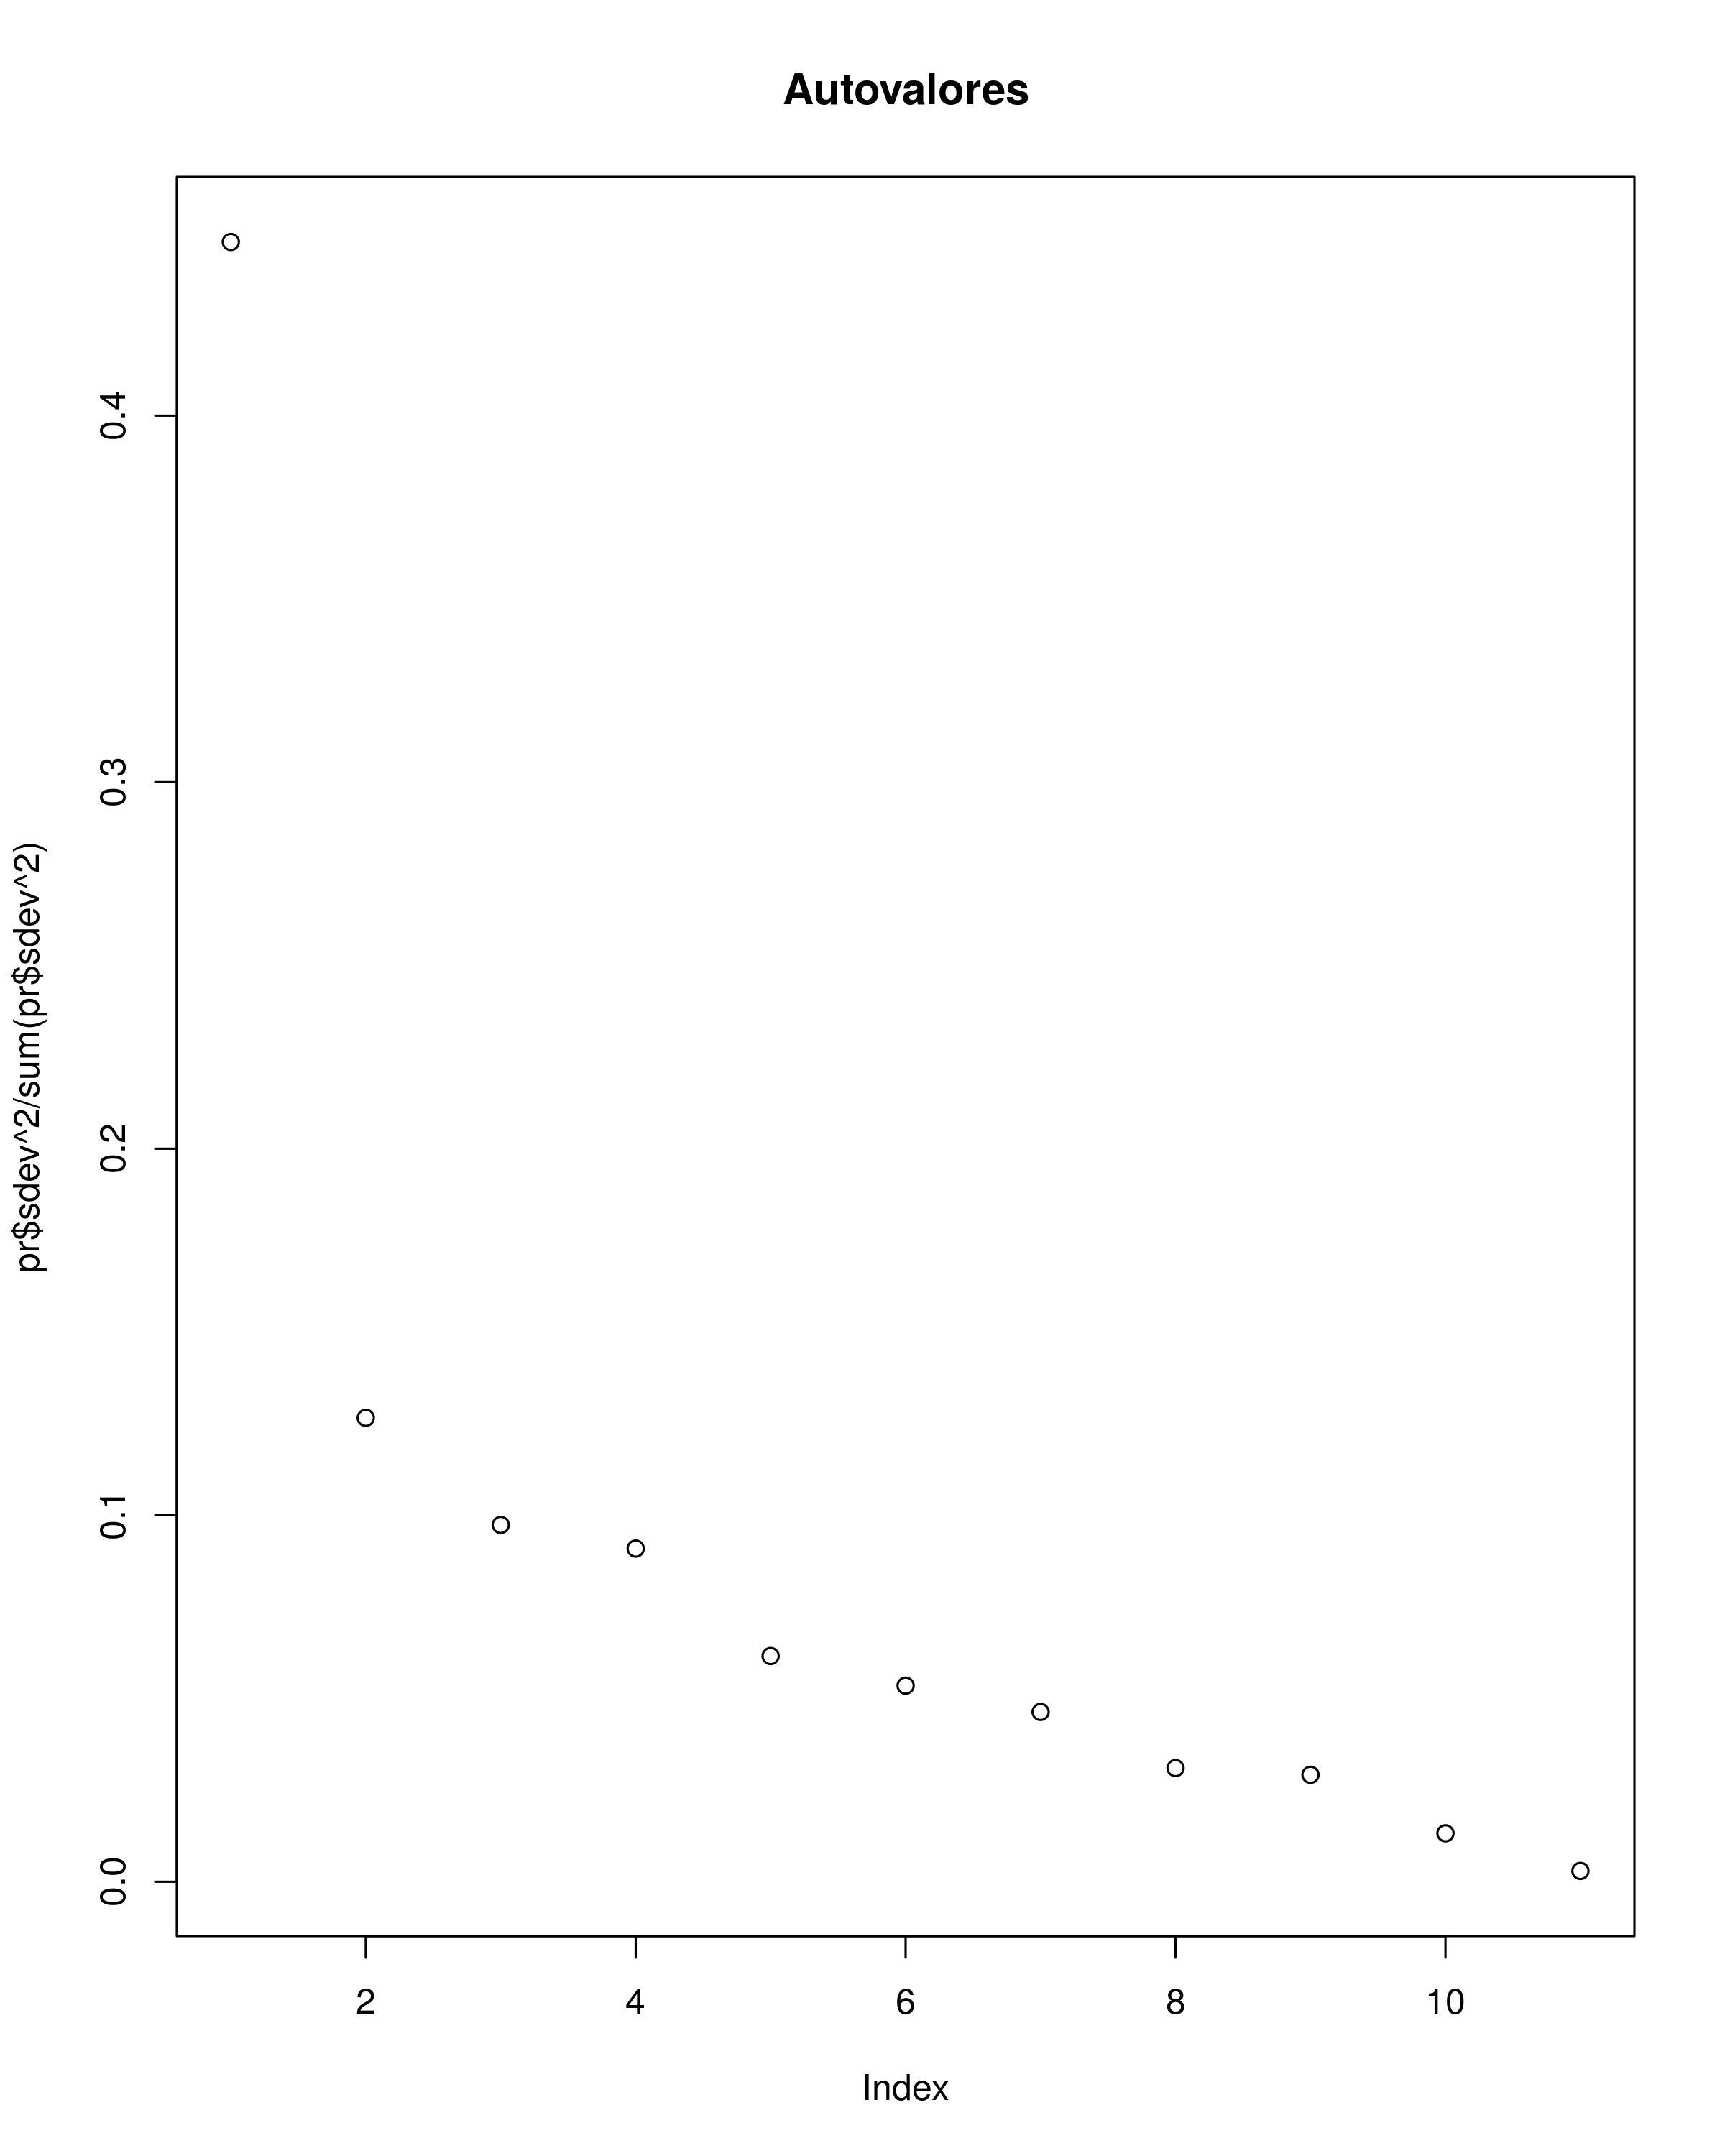

In [60]:
plot(pr$sdev^2/sum(pr$sdev^2),main="Autovalores")
# nos quedamos con 4 componentes principales

In [61]:
number_of_pca_components <- 4

In [62]:
apartam_dado <- df_madrid_pca[10,]
apartam_dado

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
10,2,1,1,1,68,1,0,94,40.40452,-3.707737,52.30363


In [63]:
#creamos funcion 
get_similar_apartments <- function(apartam_dado,num=5) {
                            apartam_dado_pr <- predict(pr,apartam_dado)
                            apartam_dado_pr <- apartam_dado_pr[,1:number_of_pca_components]
                            Apc<-pr$x[,1:number_of_pca_components]
                            dist<-rep(NA,nrow(Apc))

                            for (i in 1:nrow(Apc)){
                                dist[i]<-sum((apartam_dado_pr-Apc[i,])^2)
                                }
    
                            return(df_madrid_pca[order(dist)[0:num],])
                            }

In [64]:
get_similar_apartments(apartam_dado,5)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
10,2,1,1,1,68,1,0,94,40.40452,-3.707737,52.30363
2127,2,1,1,1,79,1,0,95,40.40954,-3.713529,52.59736
3105,2,1,1,1,49,1,0,95,40.41106,-3.715078,51.79627
2136,2,1,1,1,65,1,0,96,40.41063,-3.713974,52.22352
2113,2,1,1,1,59,1,0,95,40.40734,-3.707019,52.06330


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [65]:
number_of_pca_components <- 10
pca_train<-data.frame(pr$x[,1:number_of_pca_components])
head(pca_train)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0023357,-1.401190,-0.5345479,-0.70358851,1.3256492,-0.21815928,0.40121489,-0.04829374,0.3455453,0.93706948
2,6.9249481,-1.640281,-0.1849709,0.04774177,0.7833917,0.02757160,0.78879369,-1.48259669,-0.9803897,0.93907318
3,-1.5131651,-1.279349,0.6284014,1.31522164,-0.3085117,0.59737232,0.41830215,0.34530923,0.6957773,0.15217613
4,-2.8533912,-0.948477,0.6309243,-1.18005869,0.9048857,-0.06494637,0.74900746,0.63529288,-0.2143795,0.59624983
5,-2.8634090,-1.013479,-0.1581269,0.66746711,0.4145655,0.38527457,0.25912071,-0.08705416,-0.6971520,0.05674752
6,-0.8731009,-1.374612,-0.7266715,0.31480349,0.4562183,0.14961727,-0.04635411,0.14515549,-0.1886174,-0.16839325


In [66]:
df_madrid_pca <- subset(df_madrid, select = -c(Neighbourhood,Room.Type, Square.Feet))
df_madrid_pca <- drop_na(df_madrid_pca)
nrow(df_madrid_pca)

[1] 4130

In [67]:
pca_train <- cbind(pca_train,df_madrid_pca$neighb_id)
head(pca_train,5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,df_madrid_pca$neighb_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.002336,-1.401190,-0.5345479,-0.70358851,1.3256492,-0.21815928,0.4012149,-0.04829374,0.3455453,0.93706948,3
2,6.924948,-1.640281,-0.1849709,0.04774177,0.7833917,0.02757160,0.7887937,-1.48259669,-0.9803897,0.93907318,3
3,-1.513165,-1.279349,0.6284014,1.31522164,-0.3085117,0.59737232,0.4183022,0.34530923,0.6957773,0.15217613,3
4,-2.853391,-0.948477,0.6309243,-1.18005869,0.9048857,-0.06494637,0.7490075,0.63529288,-0.2143795,0.59624983,3
5,-2.863409,-1.013479,-0.1581269,0.66746711,0.4145655,0.38527457,0.2591207,-0.08705416,-0.6971520,0.05674752,3


In [68]:
names(pca_train)[names(pca_train) == 'df_madrid_pca$neighb_id'] <- 'neighb_id'
pca_train$neighb_id <- as.integer(pca_train$neighb_id)
head(pca_train,5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,neighb_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.002336,-1.401190,-0.5345479,-0.70358851,1.3256492,-0.21815928,0.4012149,-0.04829374,0.3455453,0.93706948,3
2,6.924948,-1.640281,-0.1849709,0.04774177,0.7833917,0.02757160,0.7887937,-1.48259669,-0.9803897,0.93907318,3
3,-1.513165,-1.279349,0.6284014,1.31522164,-0.3085117,0.59737232,0.4183022,0.34530923,0.6957773,0.15217613,3
4,-2.853391,-0.948477,0.6309243,-1.18005869,0.9048857,-0.06494637,0.7490075,0.63529288,-0.2143795,0.59624983,3
5,-2.863409,-1.013479,-0.1581269,0.66746711,0.4145655,0.38527457,0.2591207,-0.08705416,-0.6971520,0.05674752,3


In [69]:
model_pca<-lm(neighb_id~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10, data=data.frame(pca_train))
summary(model_pca)


Call:
lm(formula = neighb_id ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + 
    PC7 + PC8 + PC9 + PC10, data = data.frame(pca_train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75246  0.05748  0.14264  0.21796  1.41028 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.802663   0.007206 388.925   <2e-16 ***
PC1         -0.026980   0.003249  -8.305   <2e-16 ***
PC2         -0.077491   0.006108 -12.687   <2e-16 ***
PC3          0.008428   0.006964   1.210   0.2263    
PC4         -0.008468   0.007207  -1.175   0.2401    
PC5         -0.099913   0.008757 -11.410   <2e-16 ***
PC6         -0.100508   0.009395 -10.698   <2e-16 ***
PC7         -0.023832   0.010096  -2.361   0.0183 *  
PC8         -0.015642   0.012340  -1.268   0.2050    
PC9         -0.020429   0.012721  -1.606   0.1084    
PC10         0.022336   0.018900   1.182   0.2374    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4631 on 411

In [70]:
paste('los componentes del pca que mejor permiten clasificar por neighbour id son PC1, PC2, PC5, PC6 Y PC7')

[1] "los componentes del pca que mejor permiten clasificar por neighbour id son PC1, PC2, PC5, PC6 Y PC7"